In [1]:
import pandas as pd
import numpy as np
import catboost as cb
import geodatasets
import geopandas as gpd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.fft import fft, fftfreq
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('earthquakes.csv')

In [3]:
df.time = pd.to_datetime(df.time)
df = df.loc[df.time >= "1994-01-01"]
df = df.sort_values("time")
df = df.set_index("time")

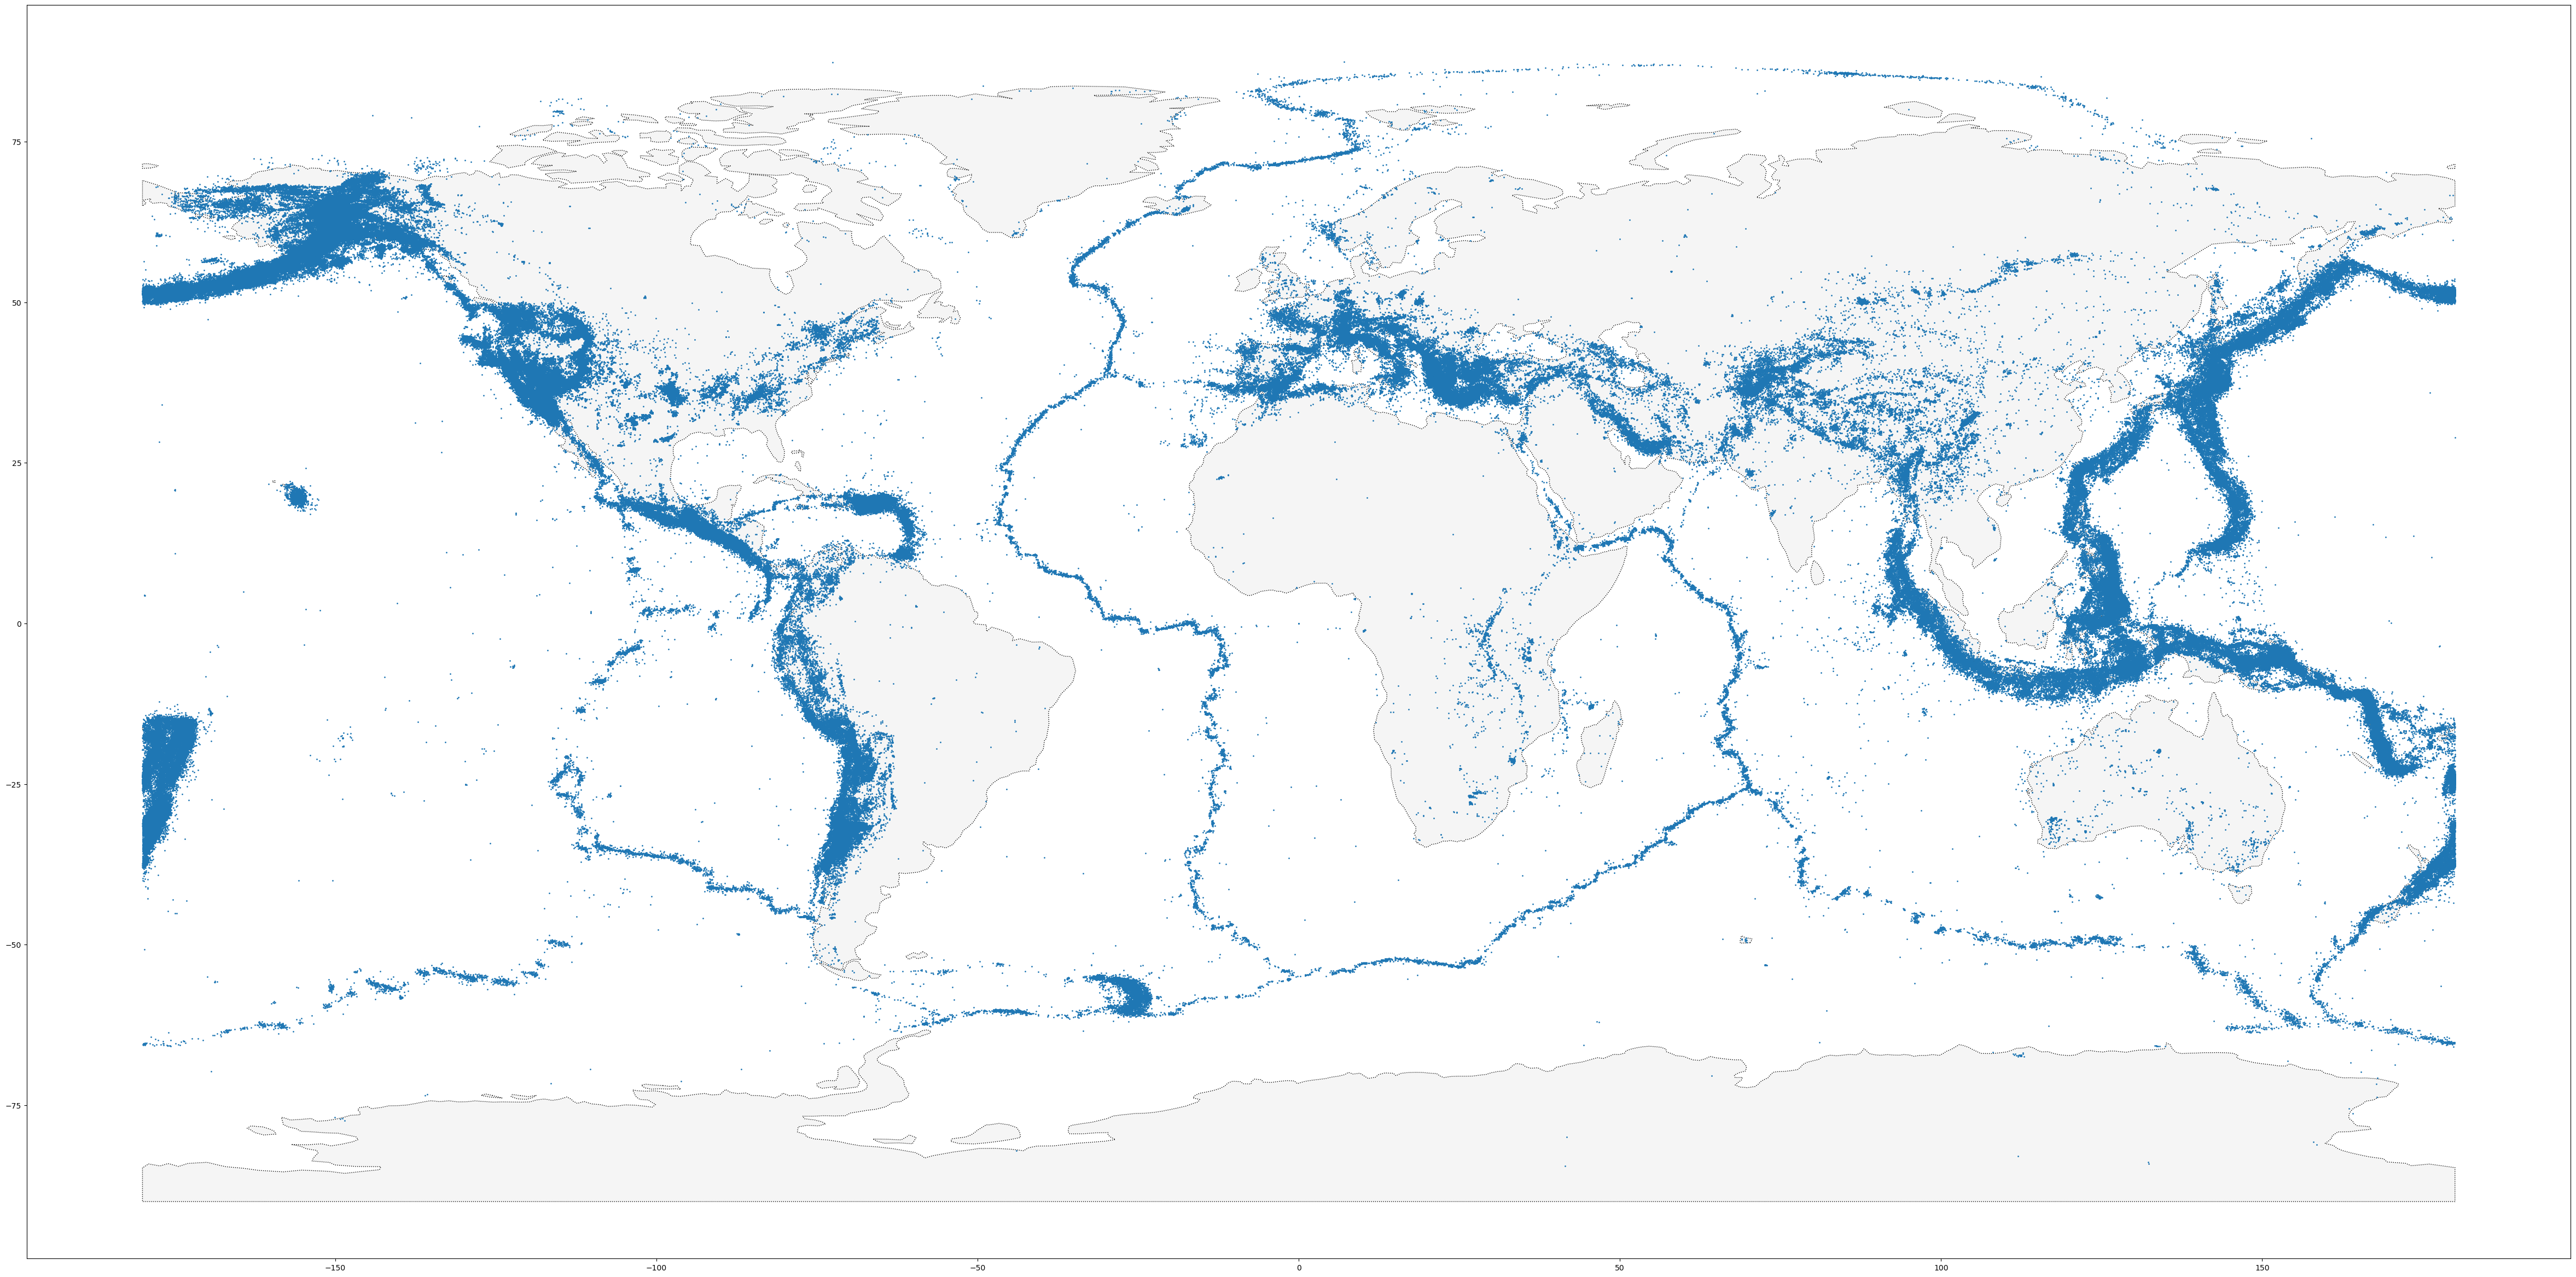

In [4]:
earthquakes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
earthquakes.crs = 'EPSG:4326'

path = geodatasets.get_path('naturalearth.land')
world = gpd.read_file(path)

ax = world.plot(figsize=(60, 60), color='whitesmoke', linestyle=':', edgecolor='black')
earthquakes.to_crs(epsg=4326).plot(markersize=1, ax=ax)
plt.show()

In [5]:
df["region"] = df.place.str.split(", ", expand=True)[1]
df.region = df.region.fillna(df.place)
df.region = df.region.replace({"CA": "California", "B.C.": "Baja California"})

df = df[["depth", "mag", "region", "latitude", "longitude"]]

In [6]:
regions = df.region.value_counts()
top_k = 25
top_k_regions = regions.head(top_k).index
df = df.loc[df.region.isin(top_k_regions)]

df = df.groupby("region").resample("d").mean()
df = df.reset_index()
df.head()

region                      time      depth       mag   latitude  \
0  Alaska 1994-01-01 00:00:00+00:00  74.540000  3.100000  60.250980   
1  Alaska 1994-01-02 00:00:00+00:00  61.183333  2.366667  60.914383   
2  Alaska 1994-01-03 00:00:00+00:00  27.942857  1.990476  62.789643   
3  Alaska 1994-01-04 00:00:00+00:00  50.640000  2.393333  60.305067   
4  Alaska 1994-01-05 00:00:00+00:00  51.933333  2.538889  61.675750   

    longitude  
0 -152.811640  
1 -150.188400  
2 -149.244229  
3 -127.430487  
4 -151.244972

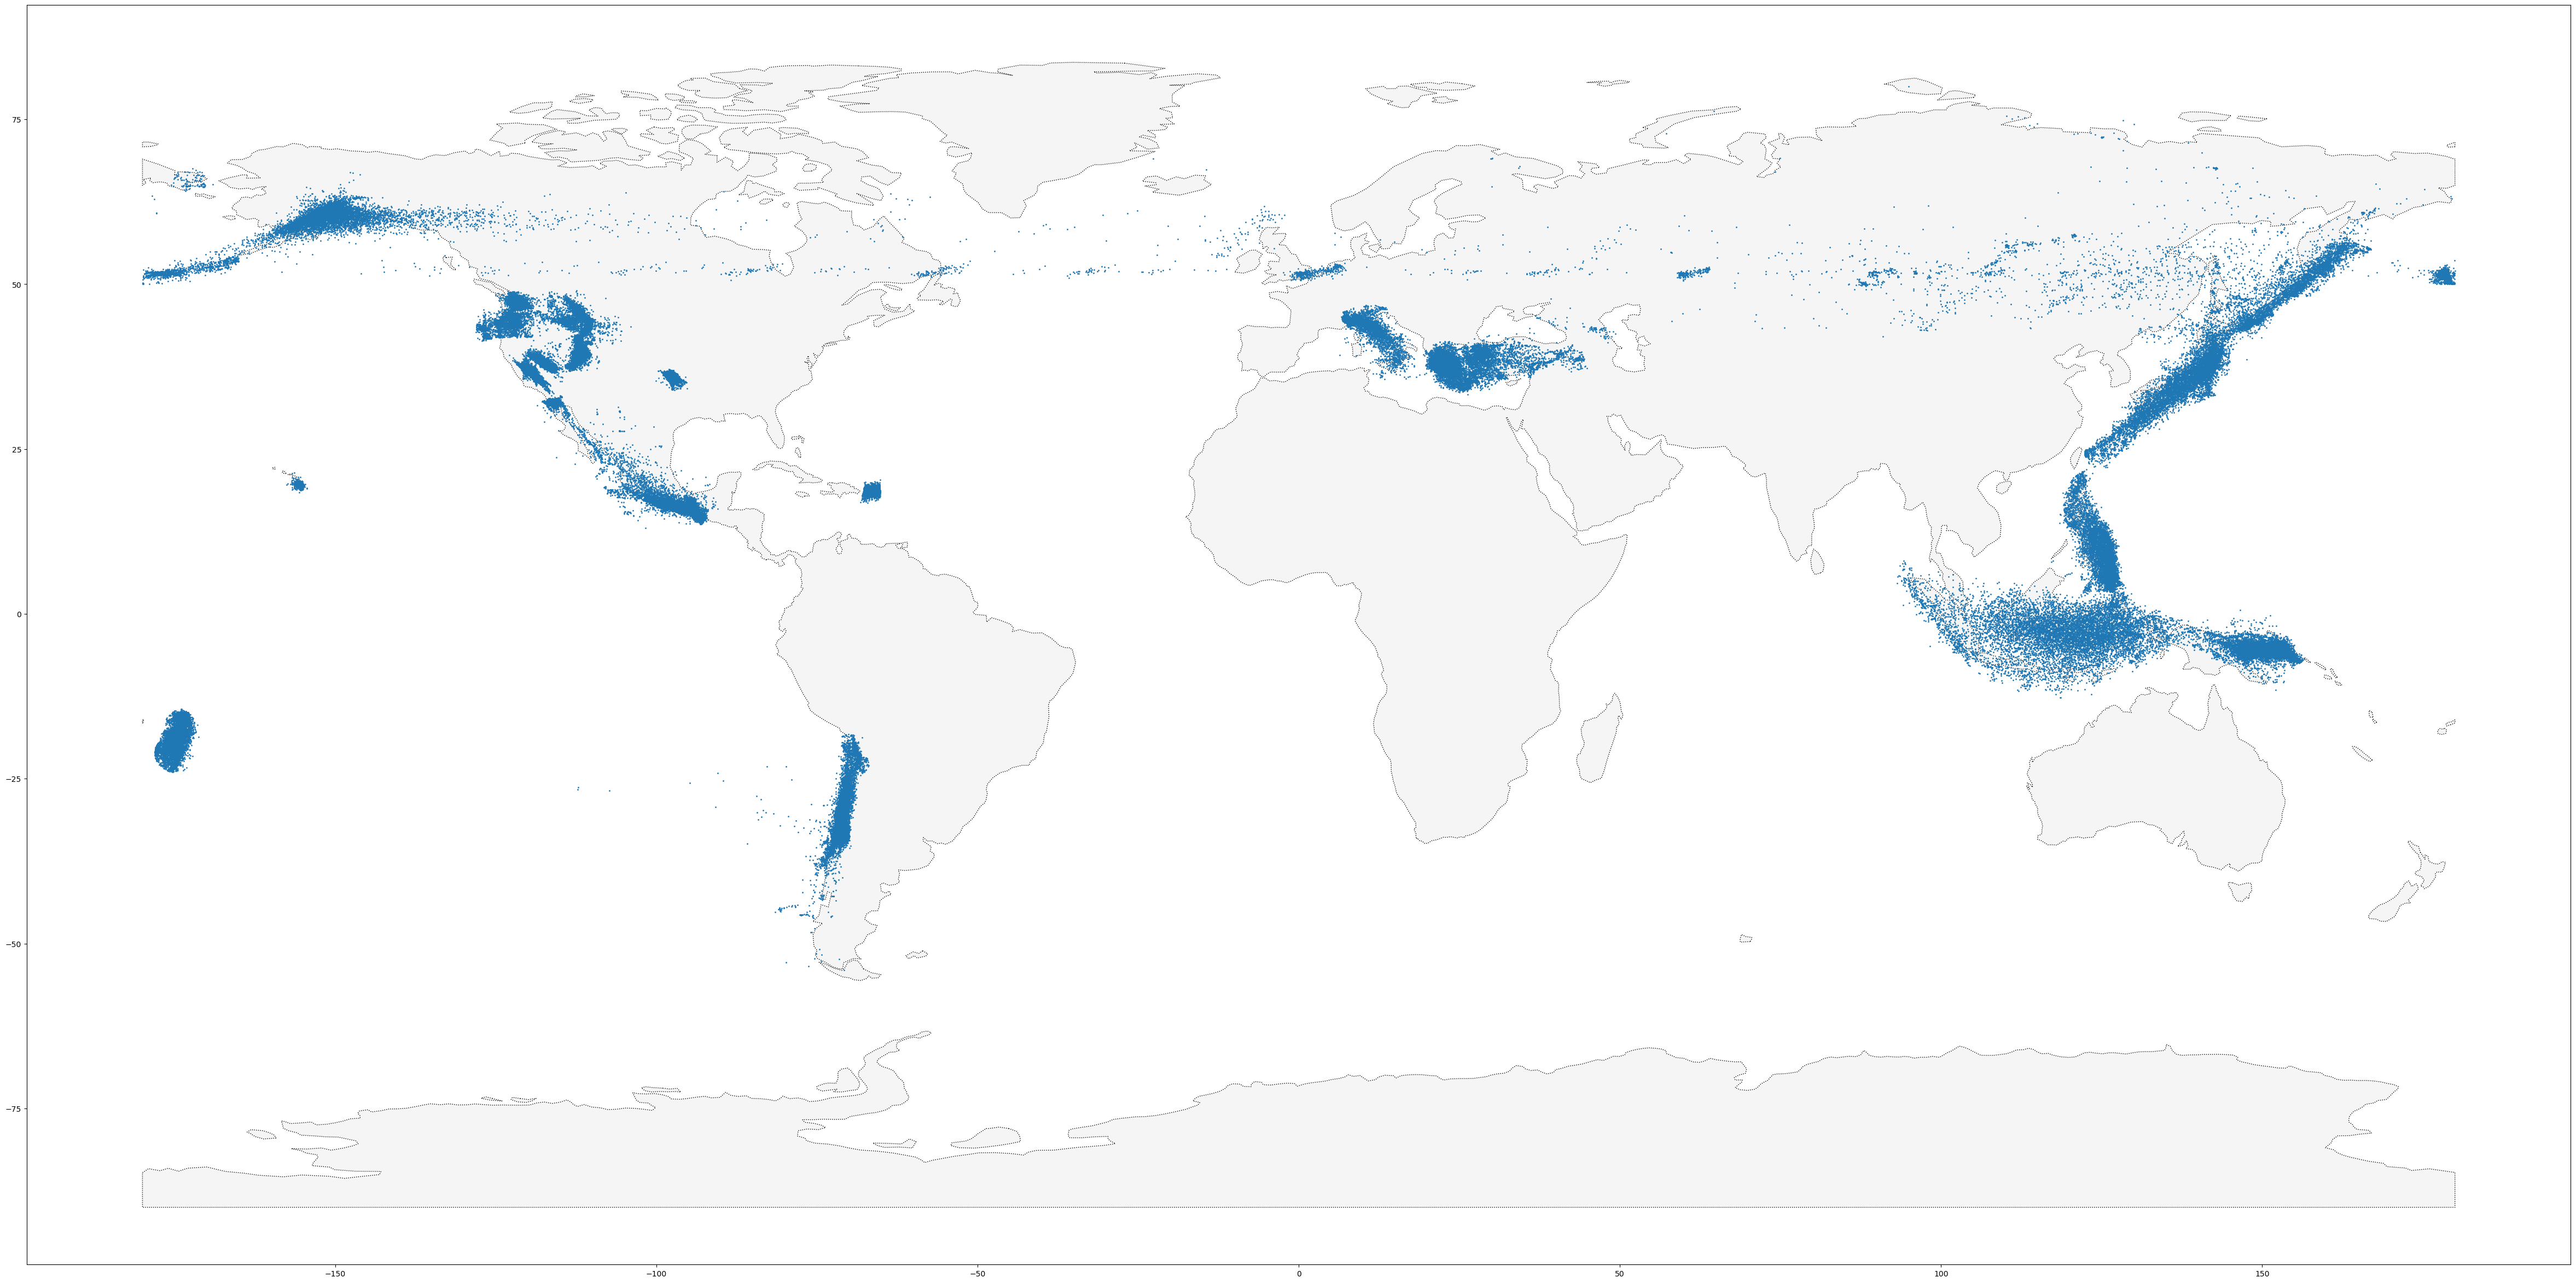

In [7]:
earthquakes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
earthquakes.crs = 'EPSG:4326'

path = geodatasets.get_path('naturalearth.land')
world = gpd.read_file(path)

ax = world.plot(figsize=(60, 60), color='whitesmoke', linestyle=':', edgecolor='black')
earthquakes.to_crs(epsg=4326).plot(markersize=1, ax=ax)
plt.show()

In [8]:
df.mag = df.groupby('region').mag.ffill()
df.depth = df.groupby('region').depth.ffill()
df.latitude = df.groupby('region').latitude.ffill()
df.longitude = df.groupby('region').longitude.ffill()

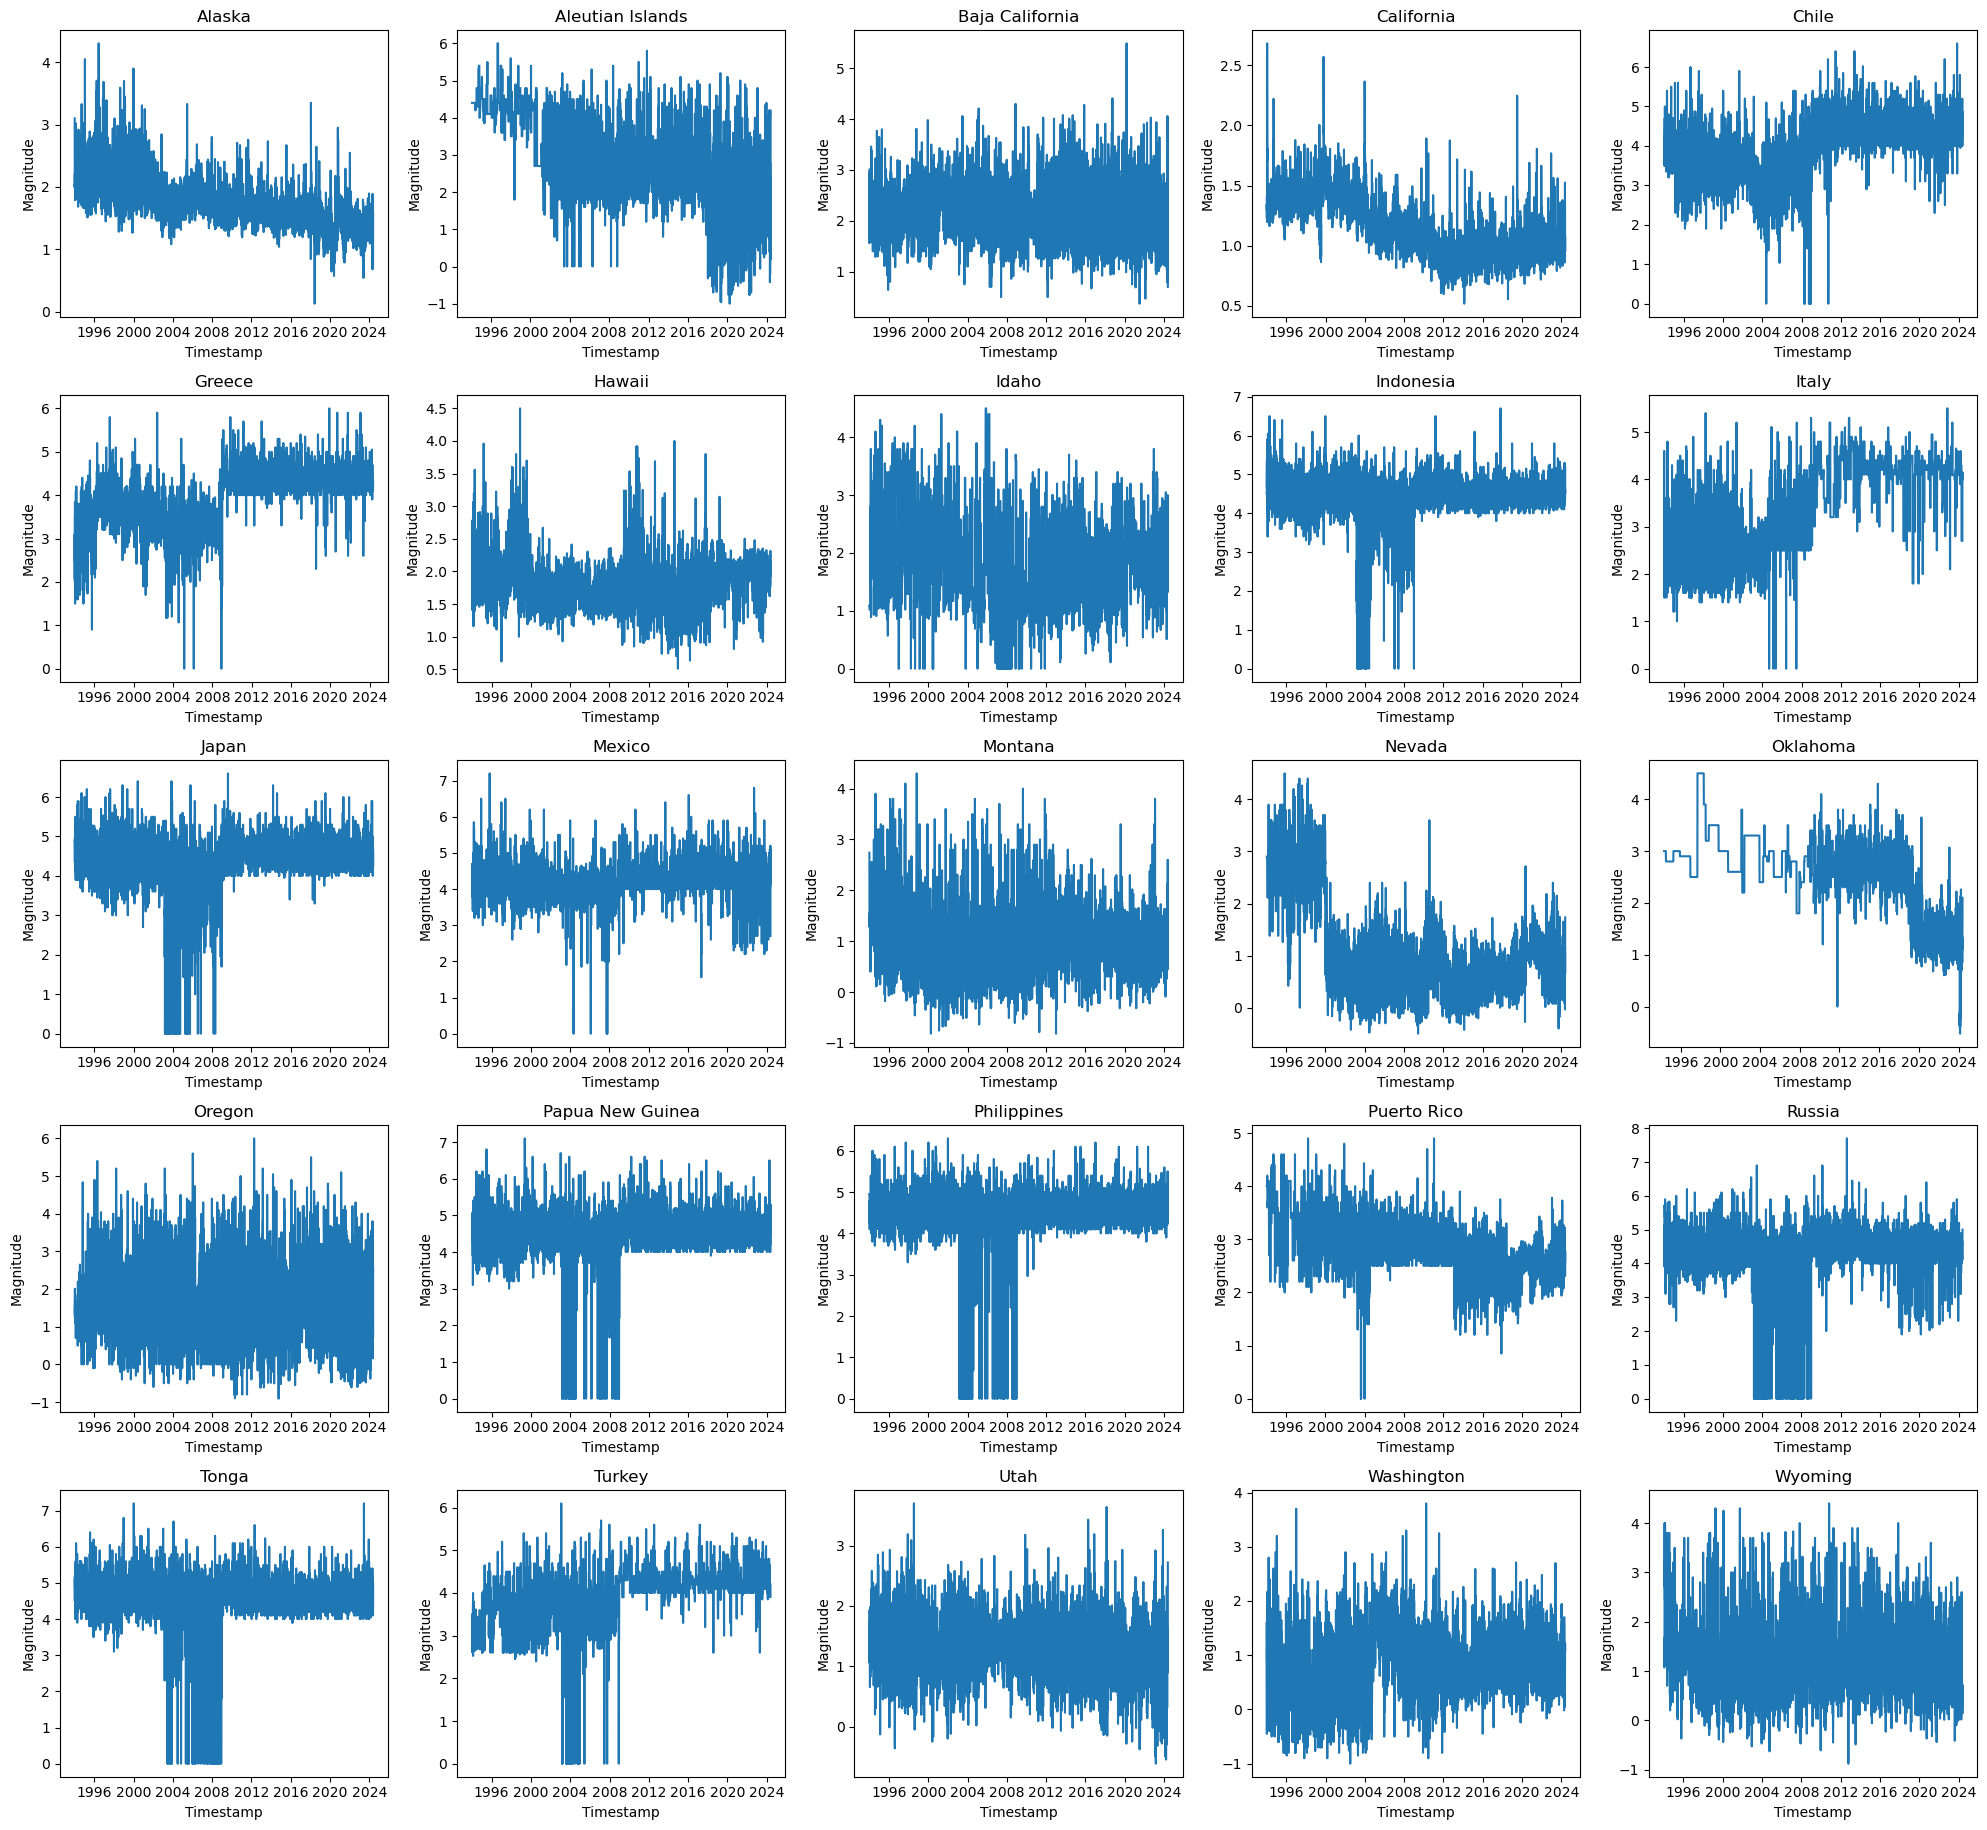

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.plot(region_data['time'], region_data['mag'])
    ax.set_title(regions[i])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Magnitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

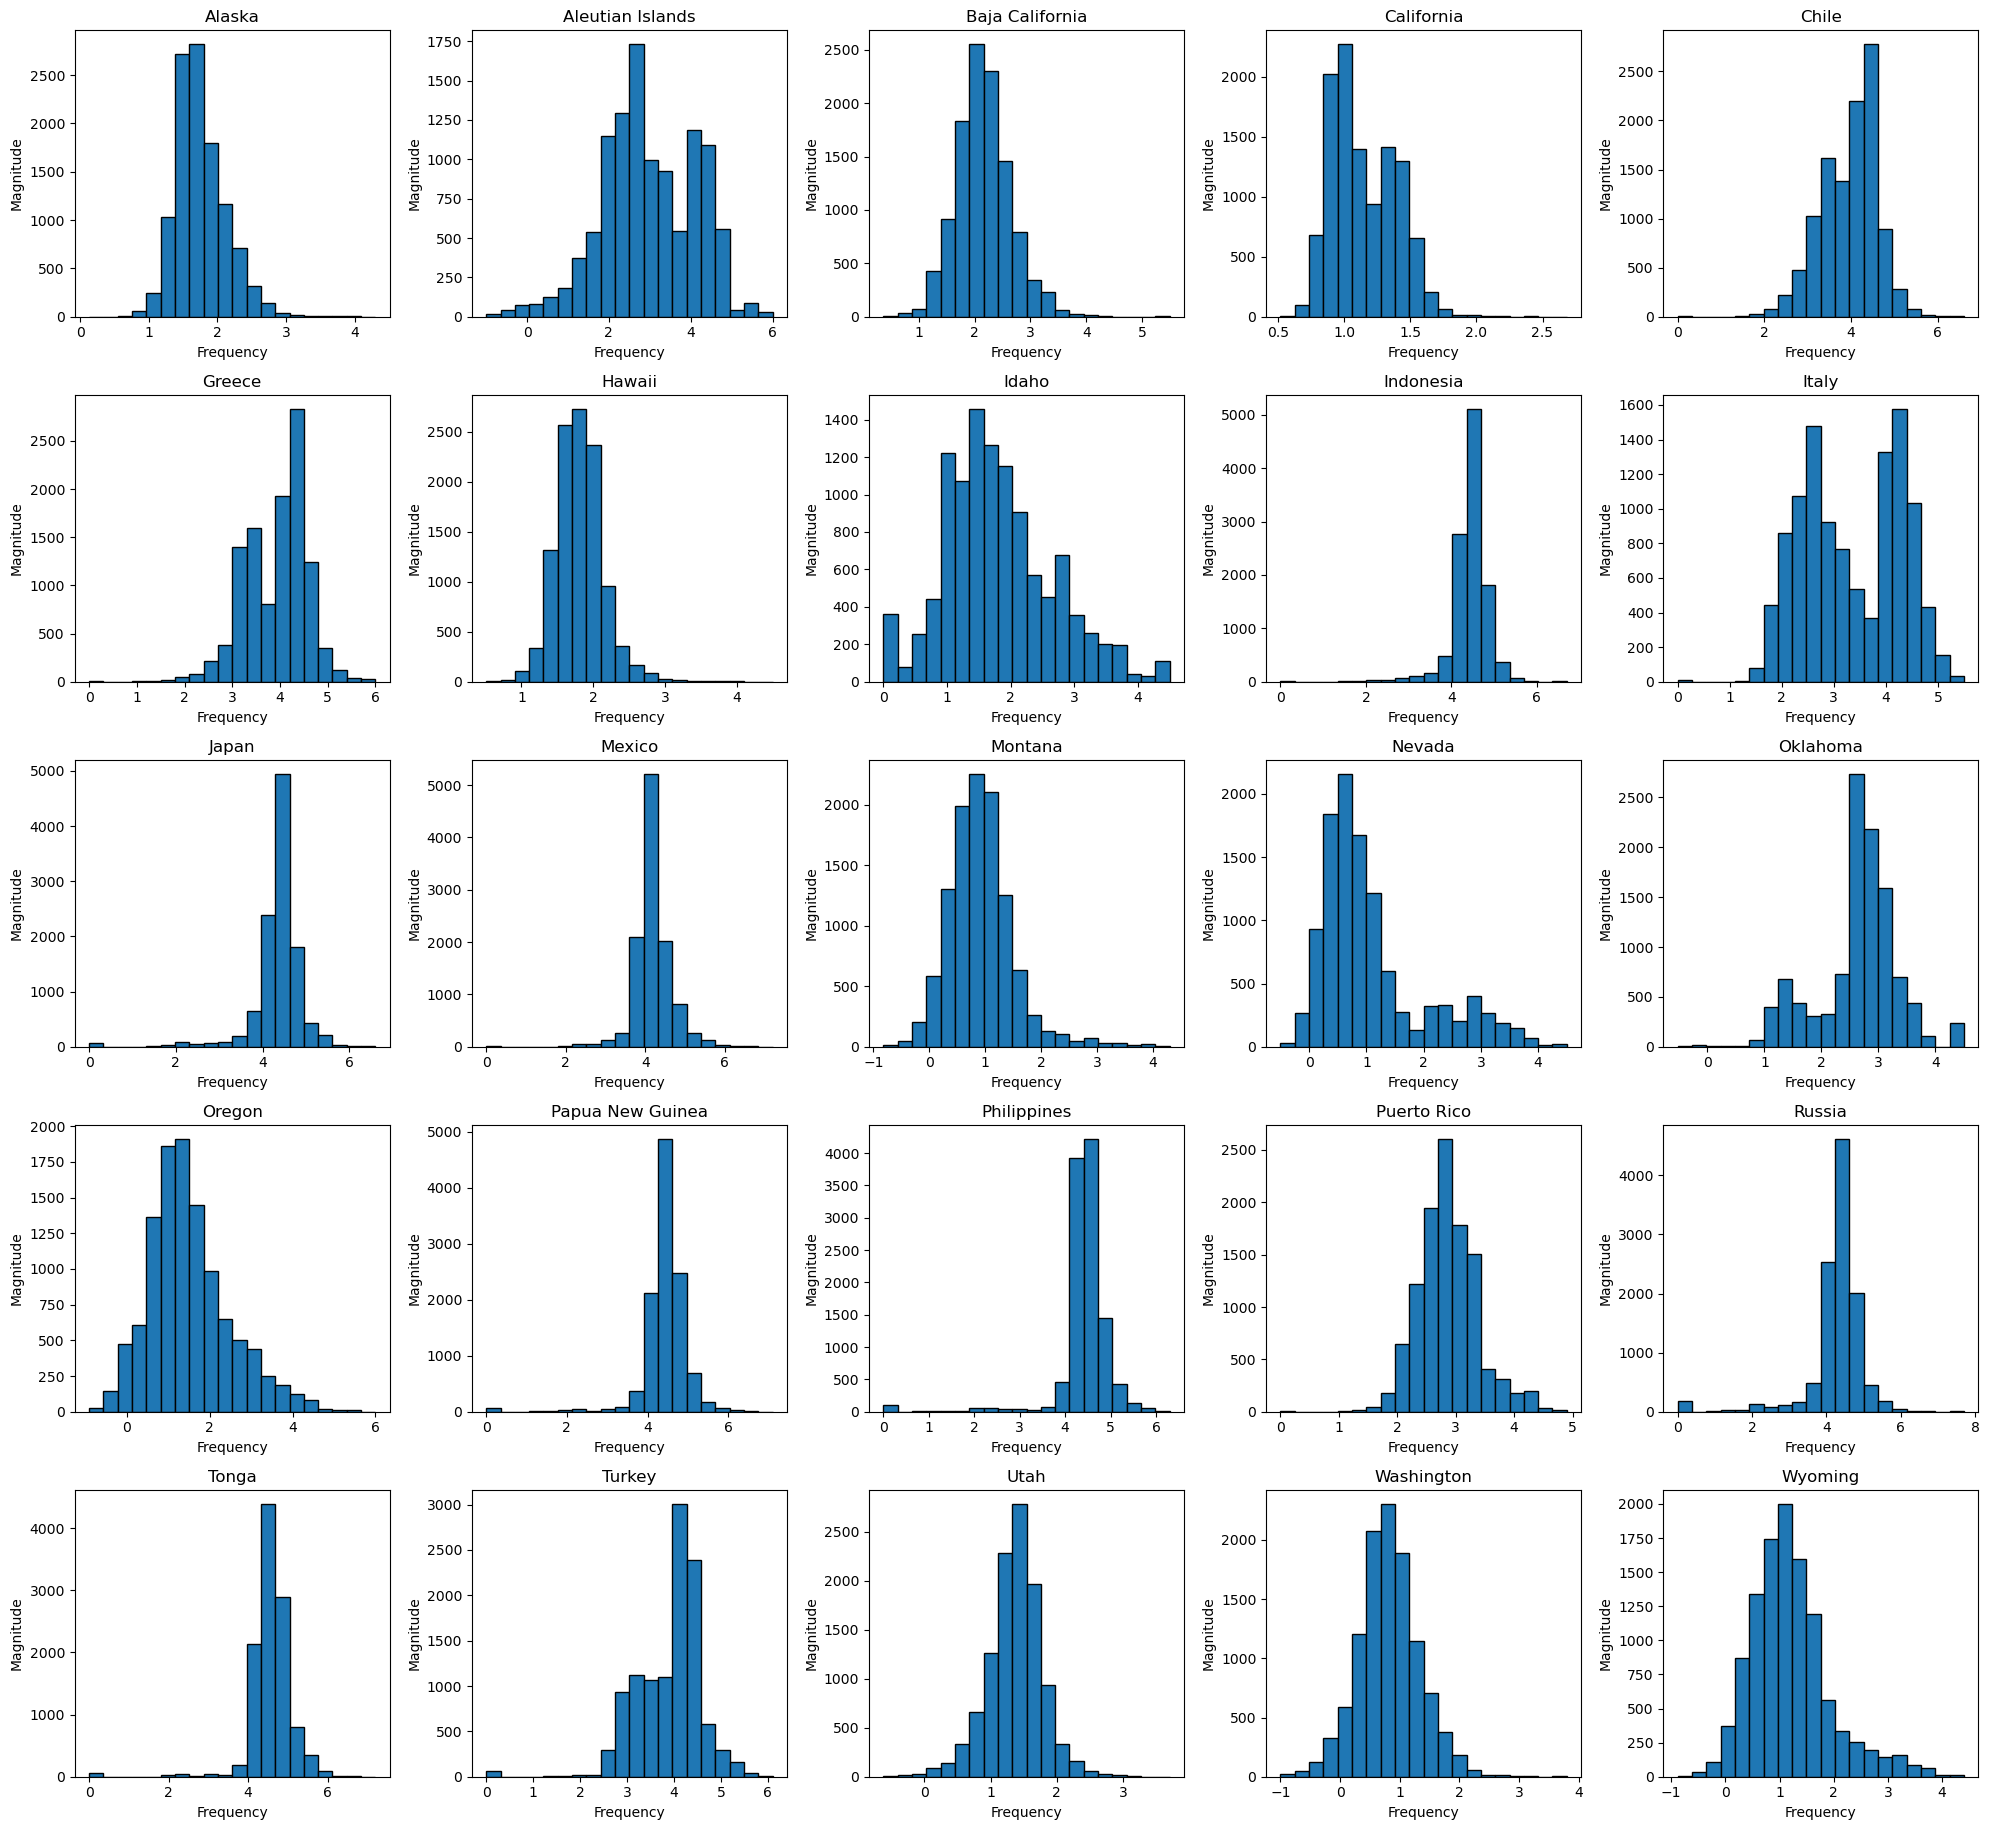

In [10]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.hist(region_data['mag'], bins=20, edgecolor='black')
    ax.set_title(regions[i])
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Magnitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

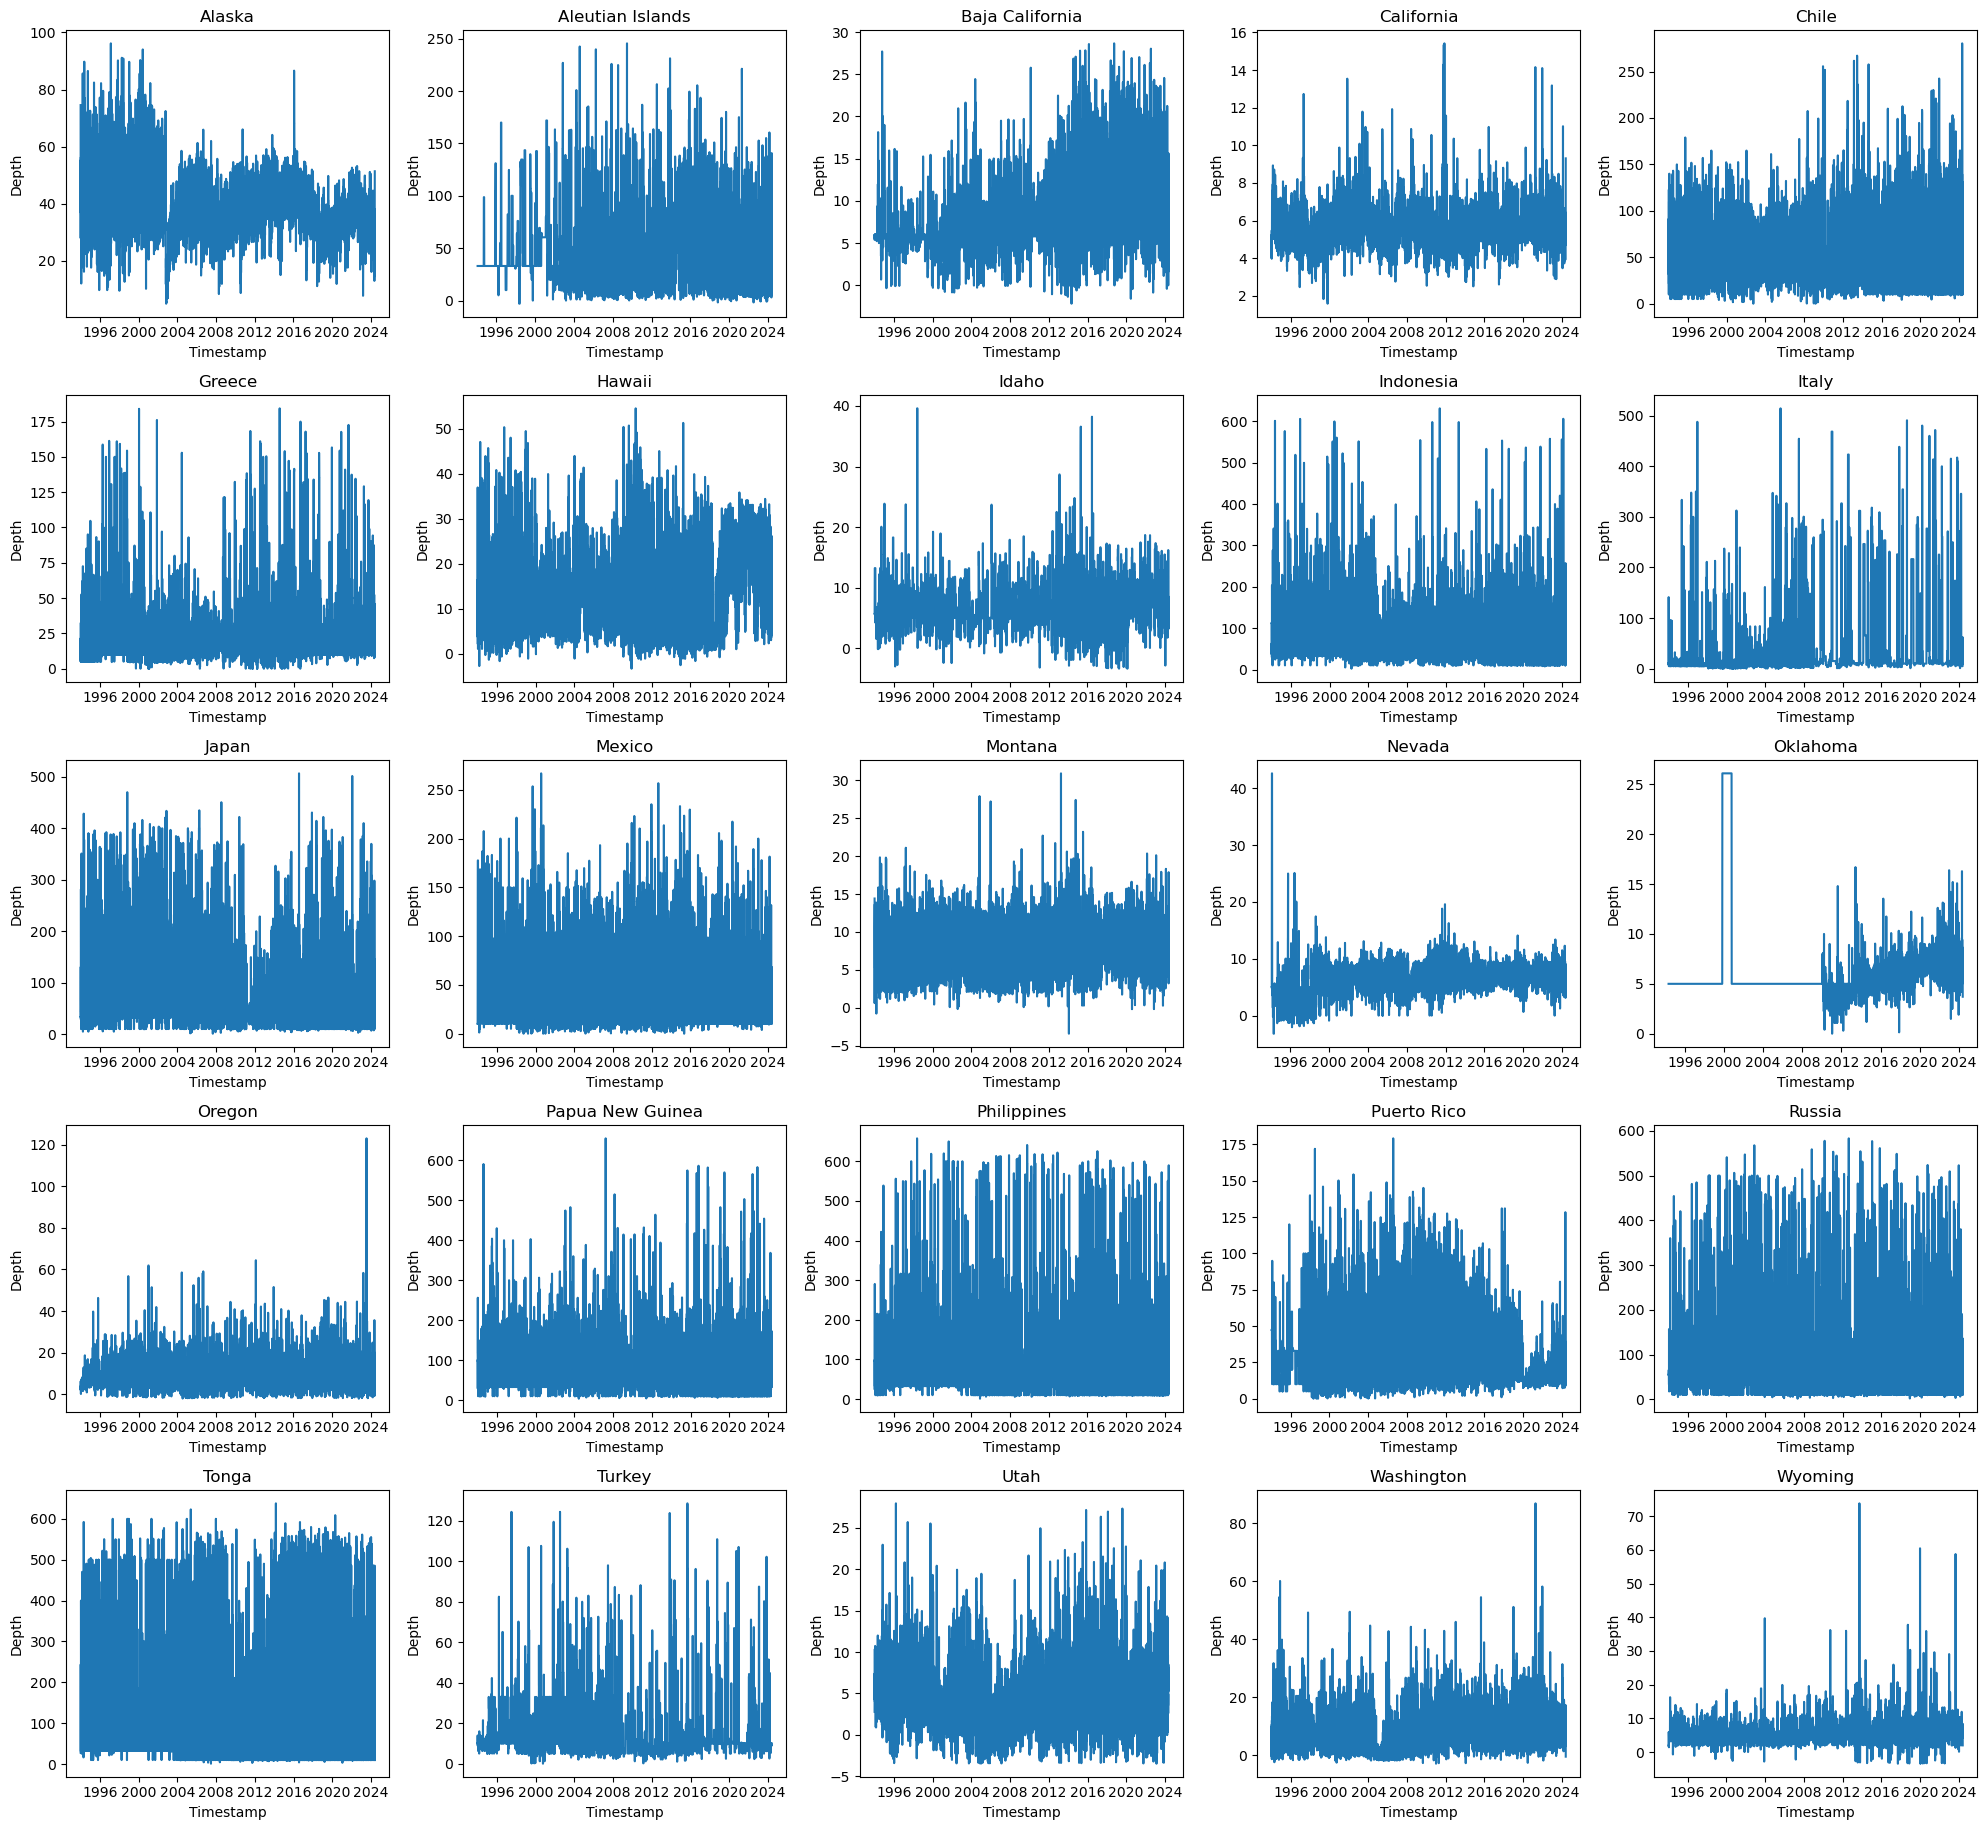

In [11]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.plot(region_data['time'], region_data['depth'])
    ax.set_title(regions[i])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Depth')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

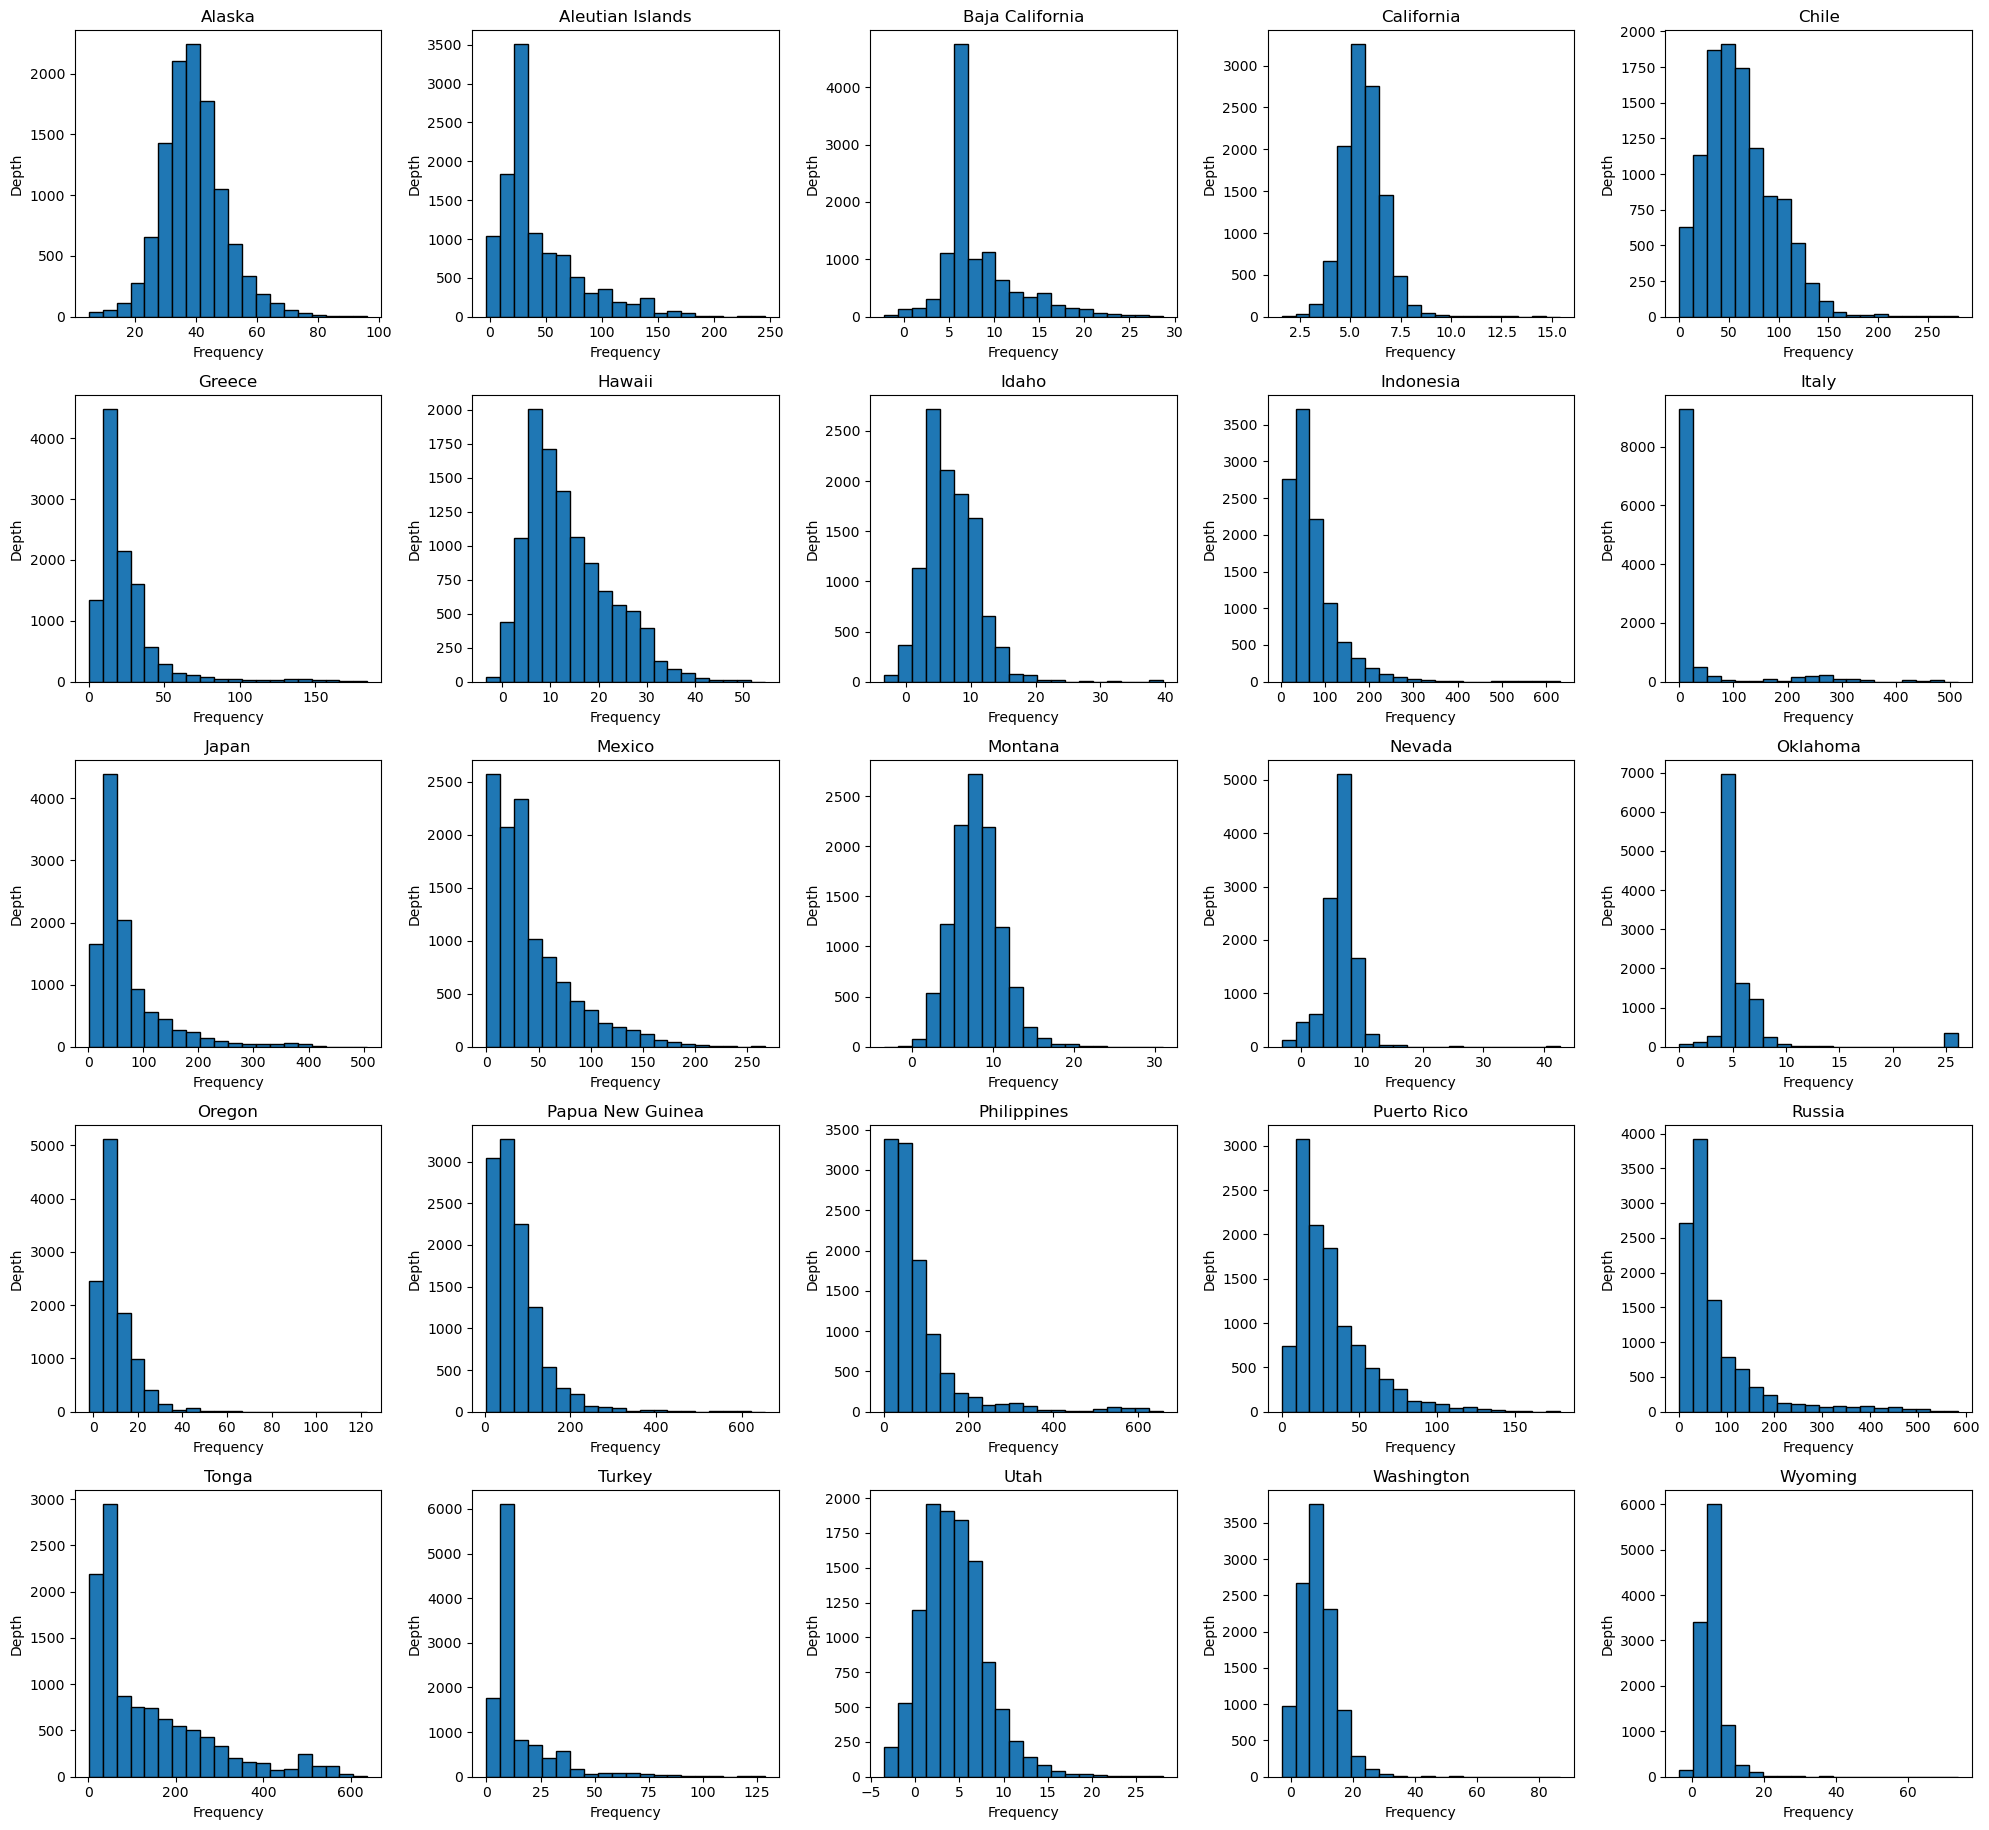

In [12]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.hist(region_data['depth'], bins=20, edgecolor='black')
    ax.set_title(regions[i])
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Depth')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

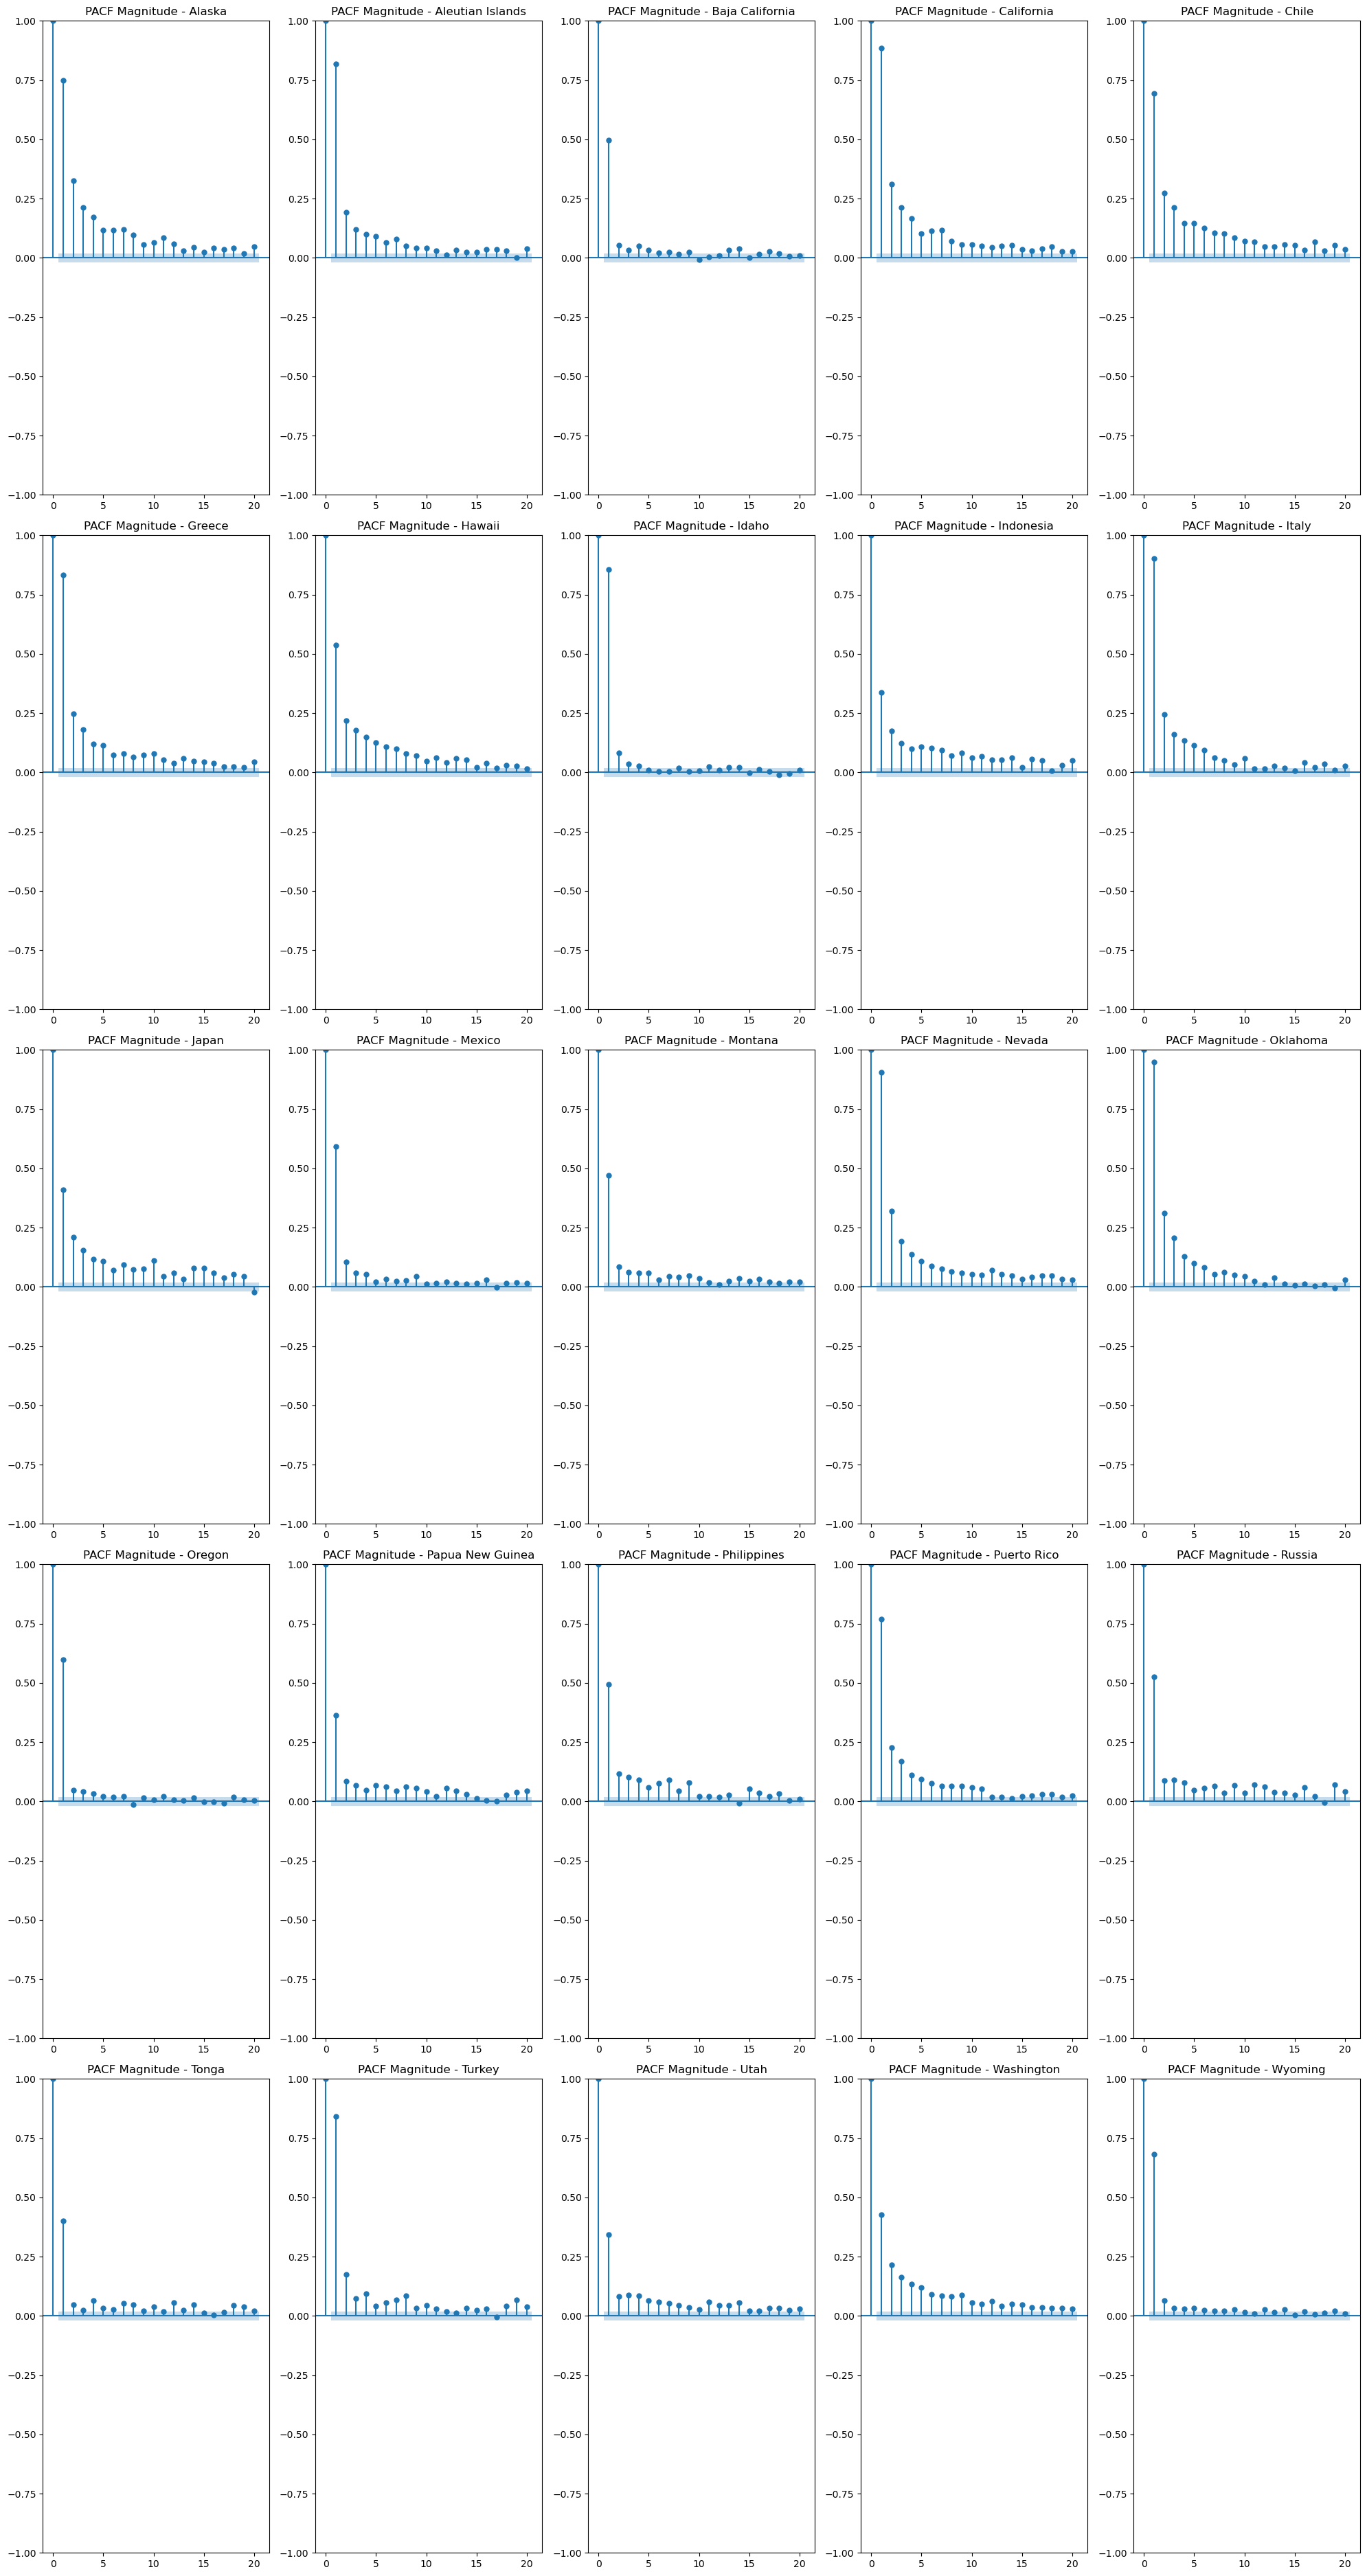

In [13]:
fig, axes = plt.subplots(5, 5, figsize=(20, 40), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]['mag']
    plot_pacf(region_data, lags=20, ax=ax, title=f'PACF Magnitude - {regions[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

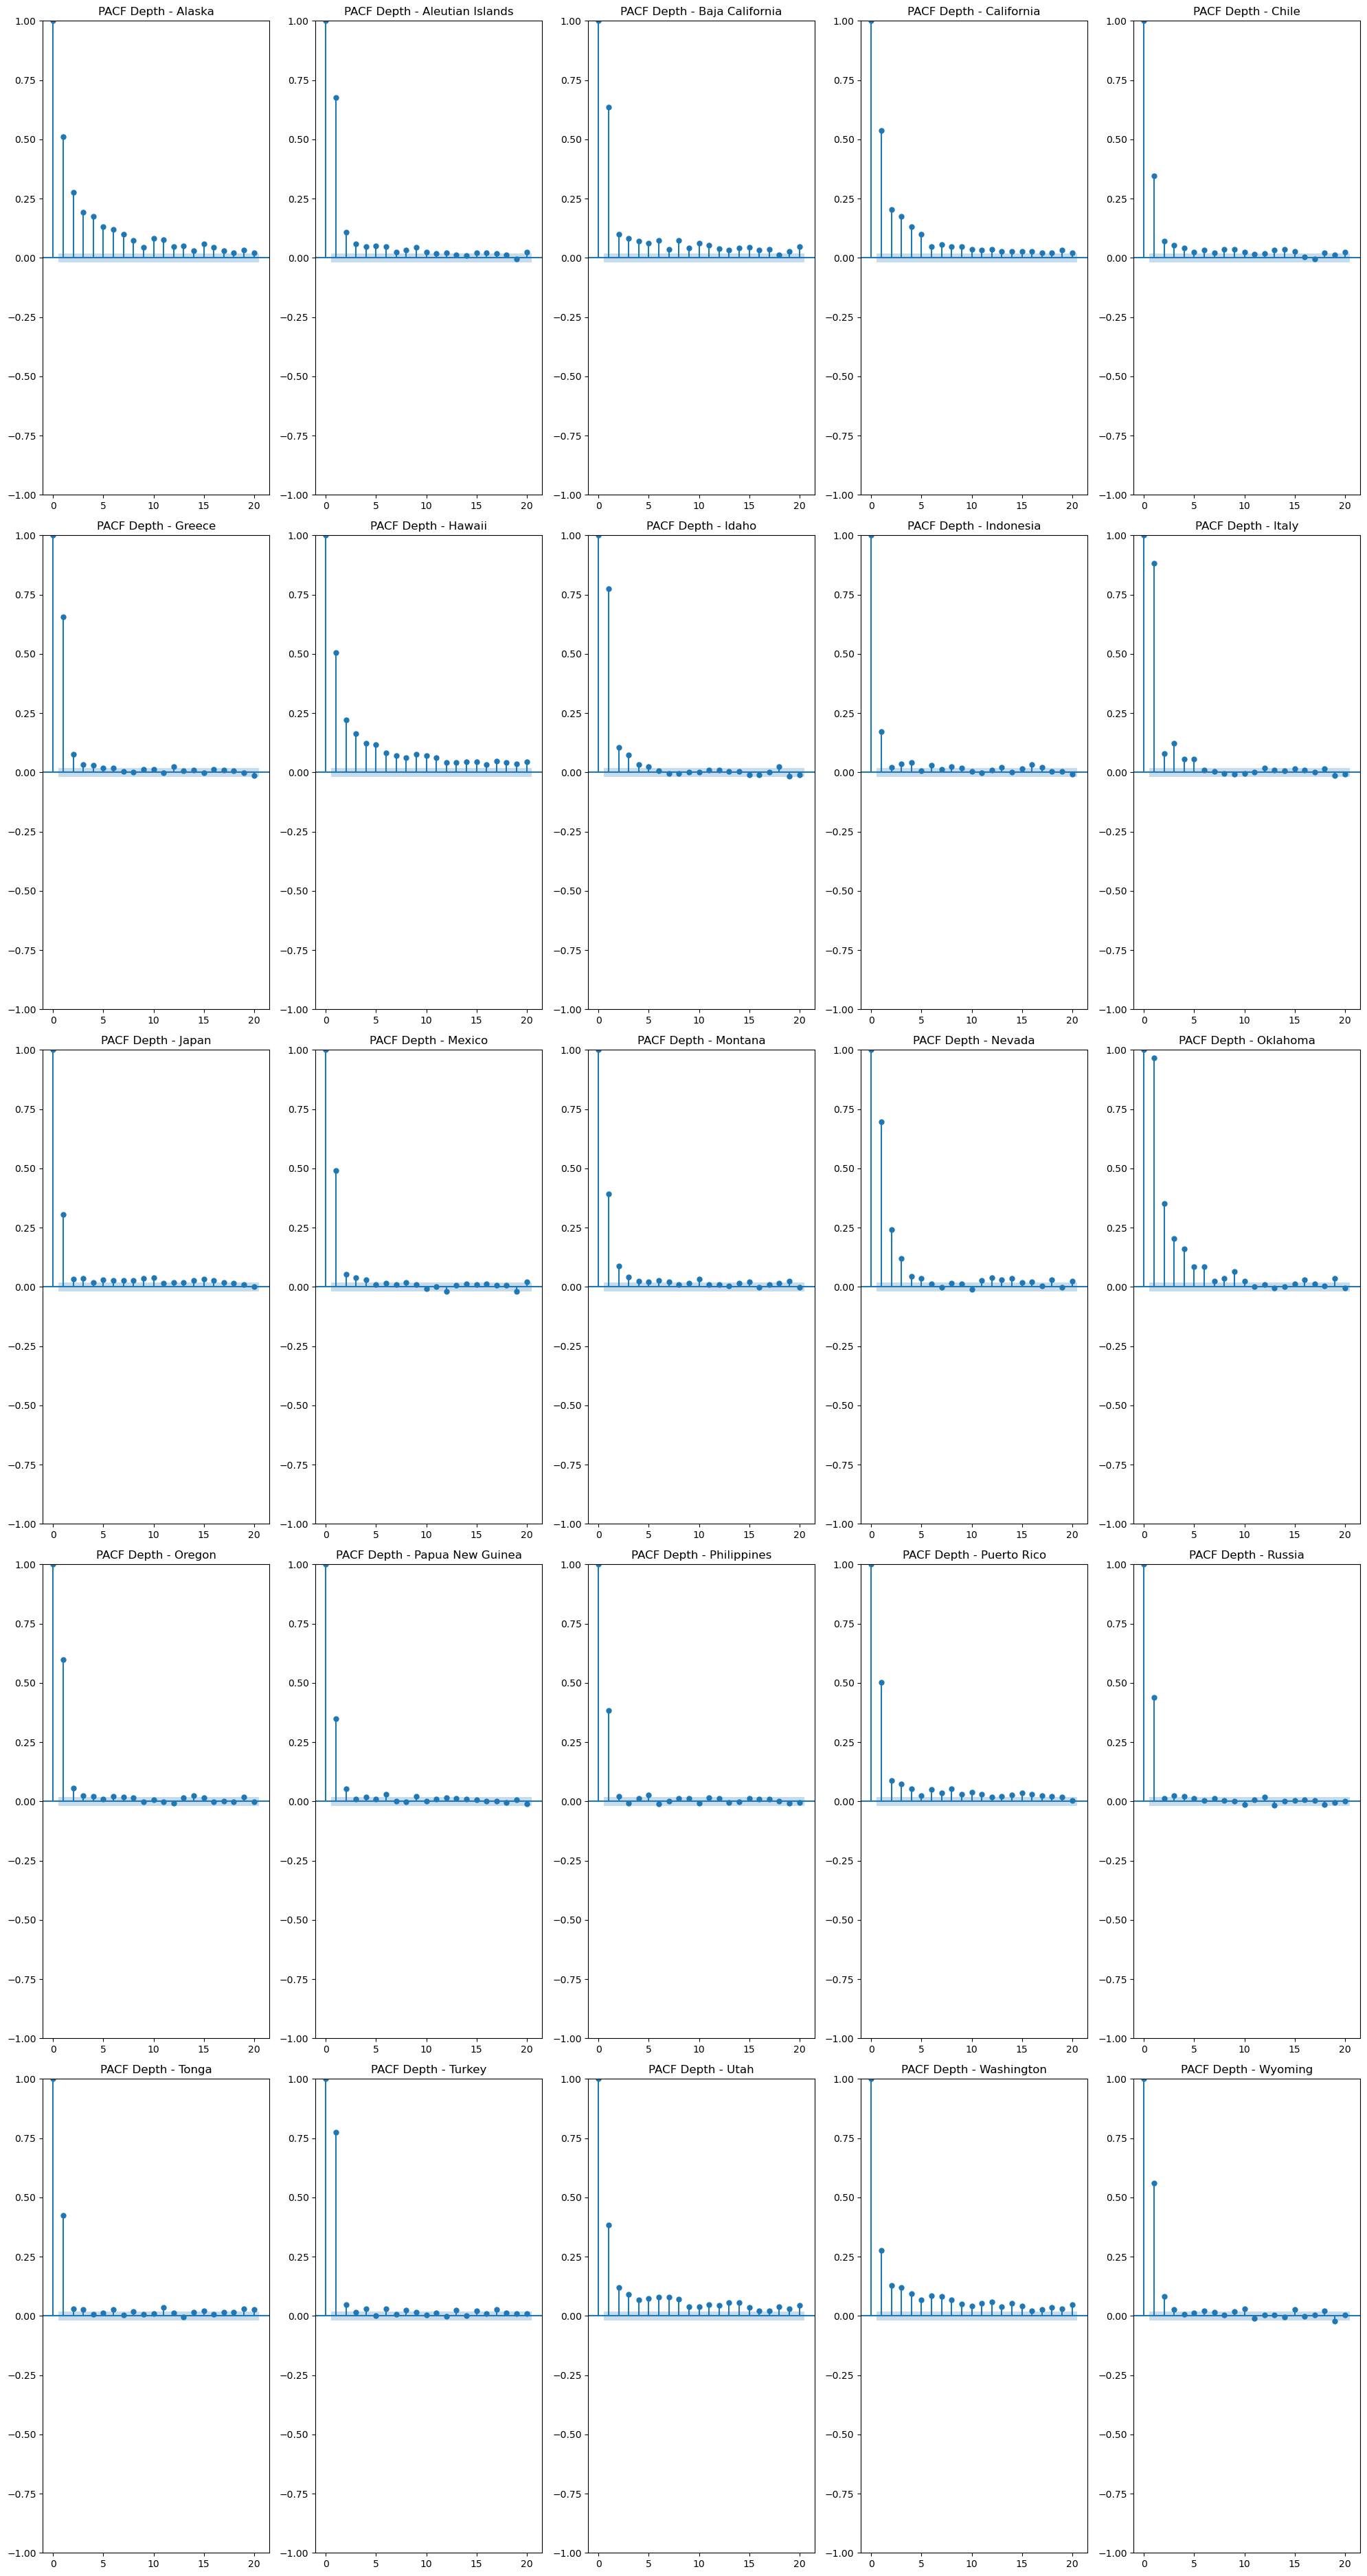

In [14]:
fig, axes = plt.subplots(5, 5, figsize=(20, 40), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]['depth']
    plot_pacf(region_data, lags=20, ax=ax, title=f'PACF Depth - {regions[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

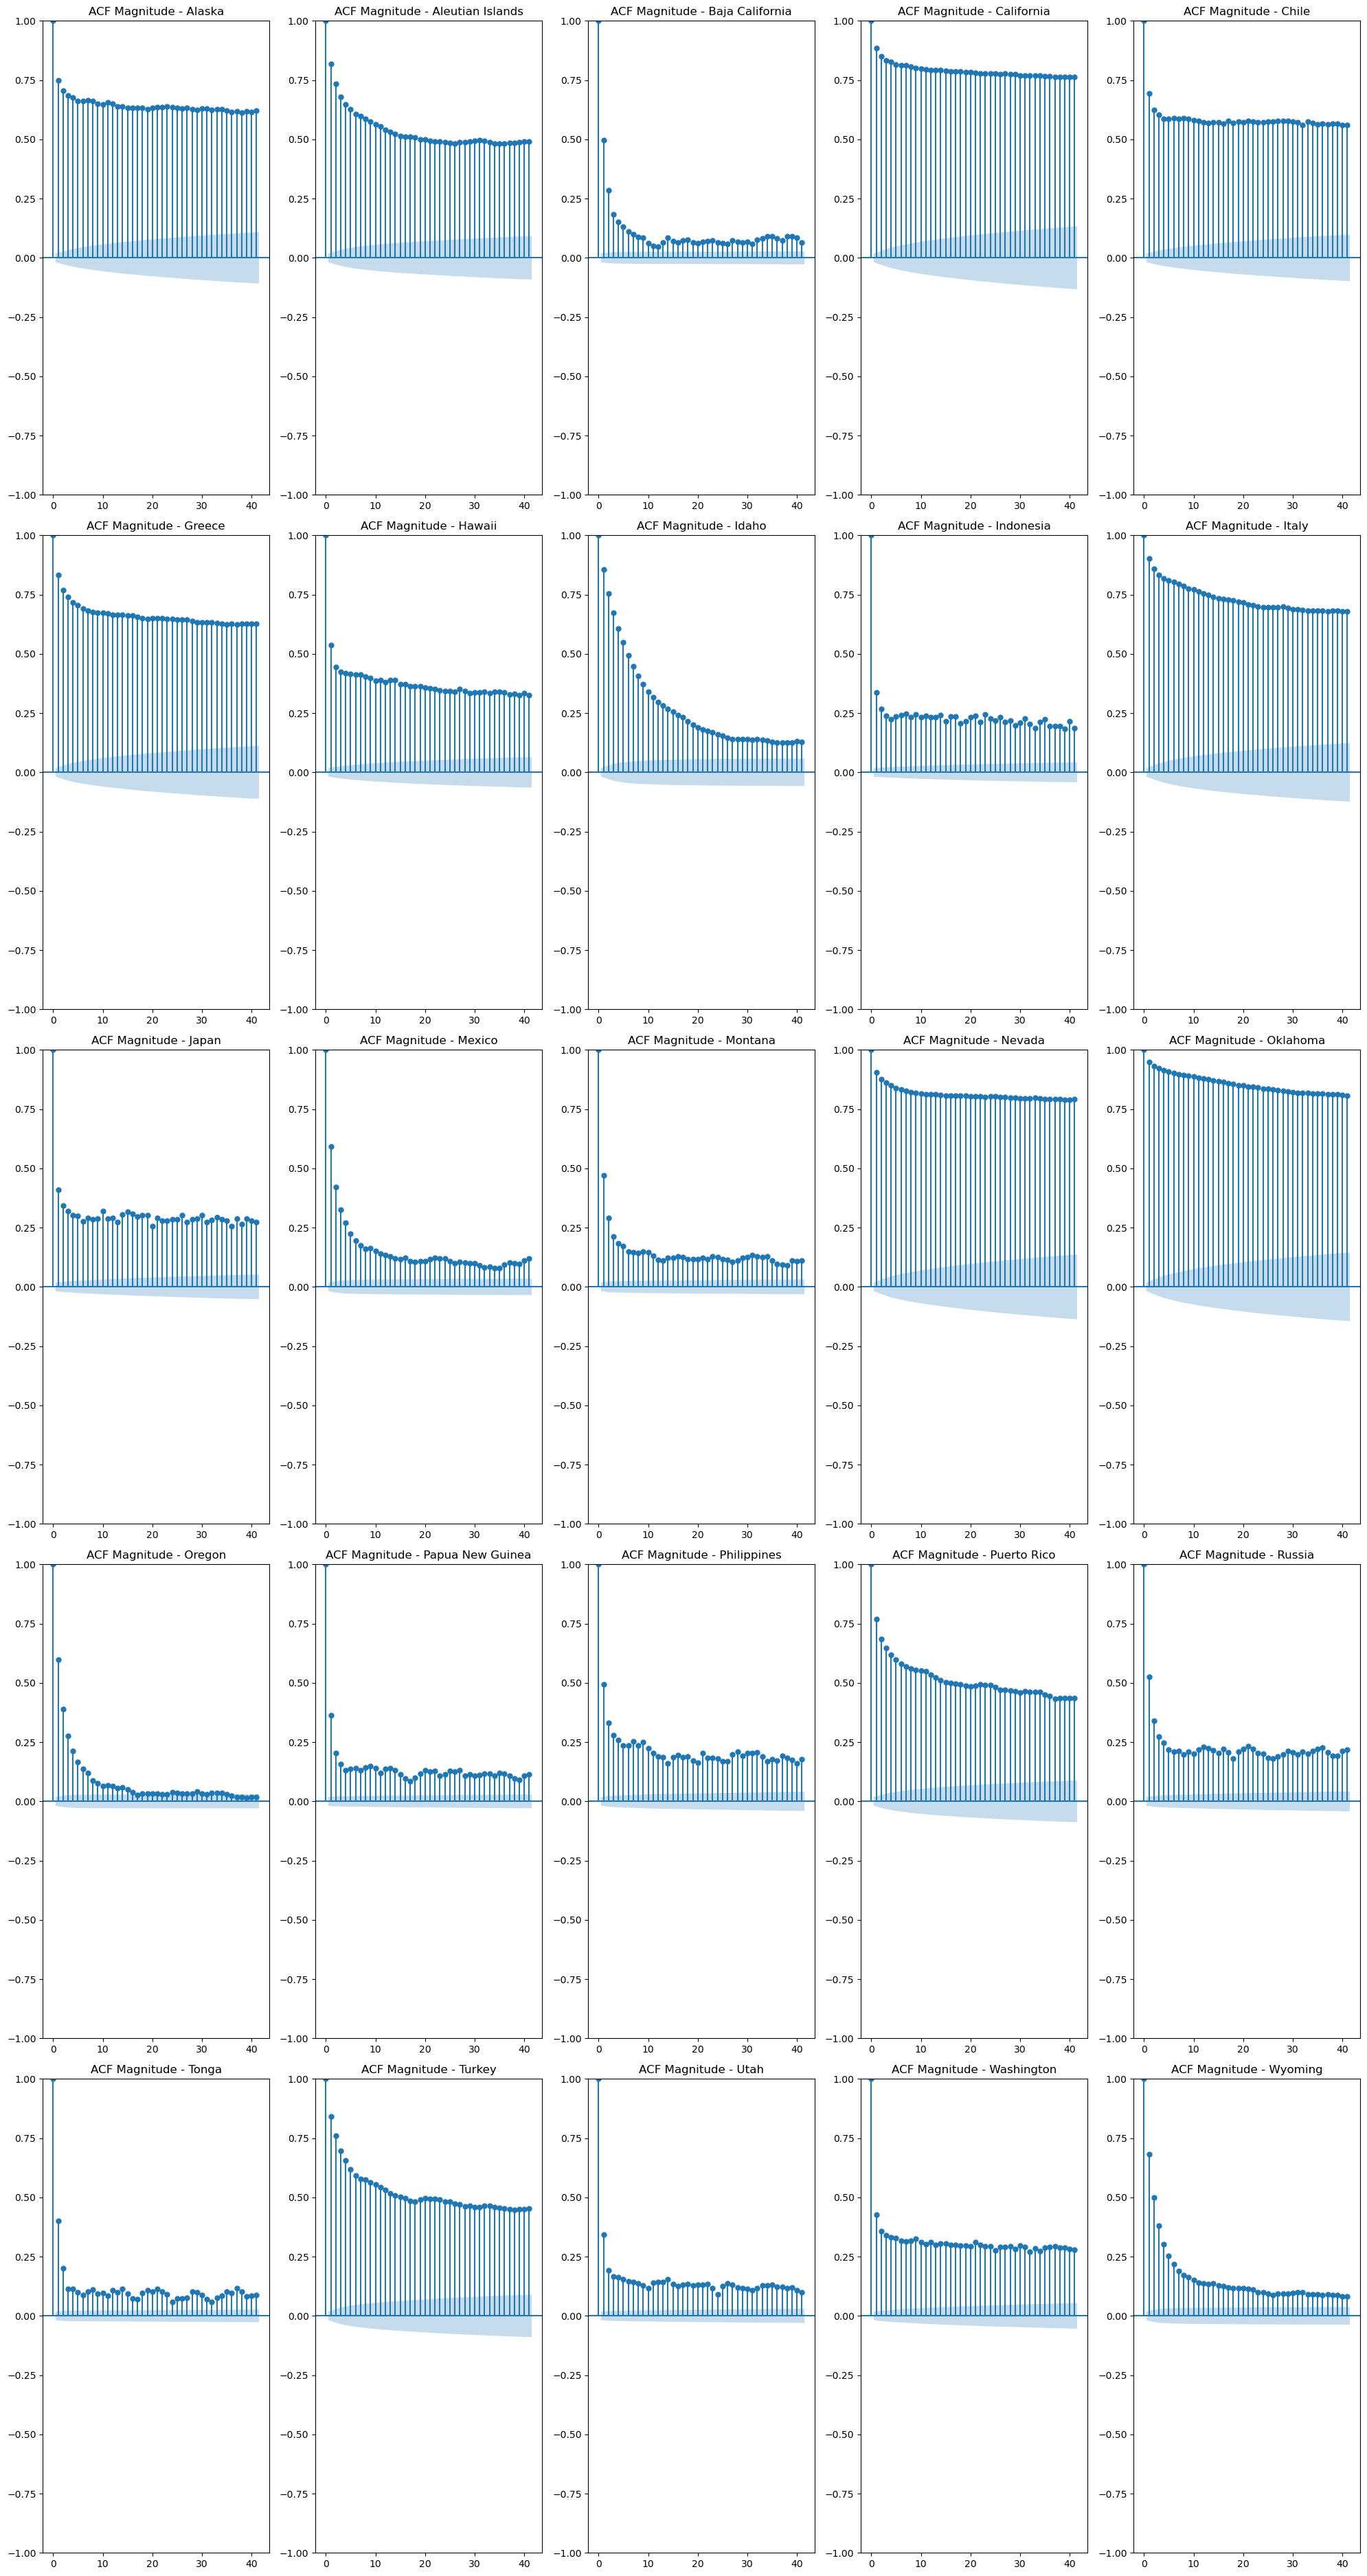

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(20, 40), sharex=False, sharey=False)

for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]['mag']
    plot_acf(region_data, ax=ax, title=f'ACF Magnitude - {regions[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

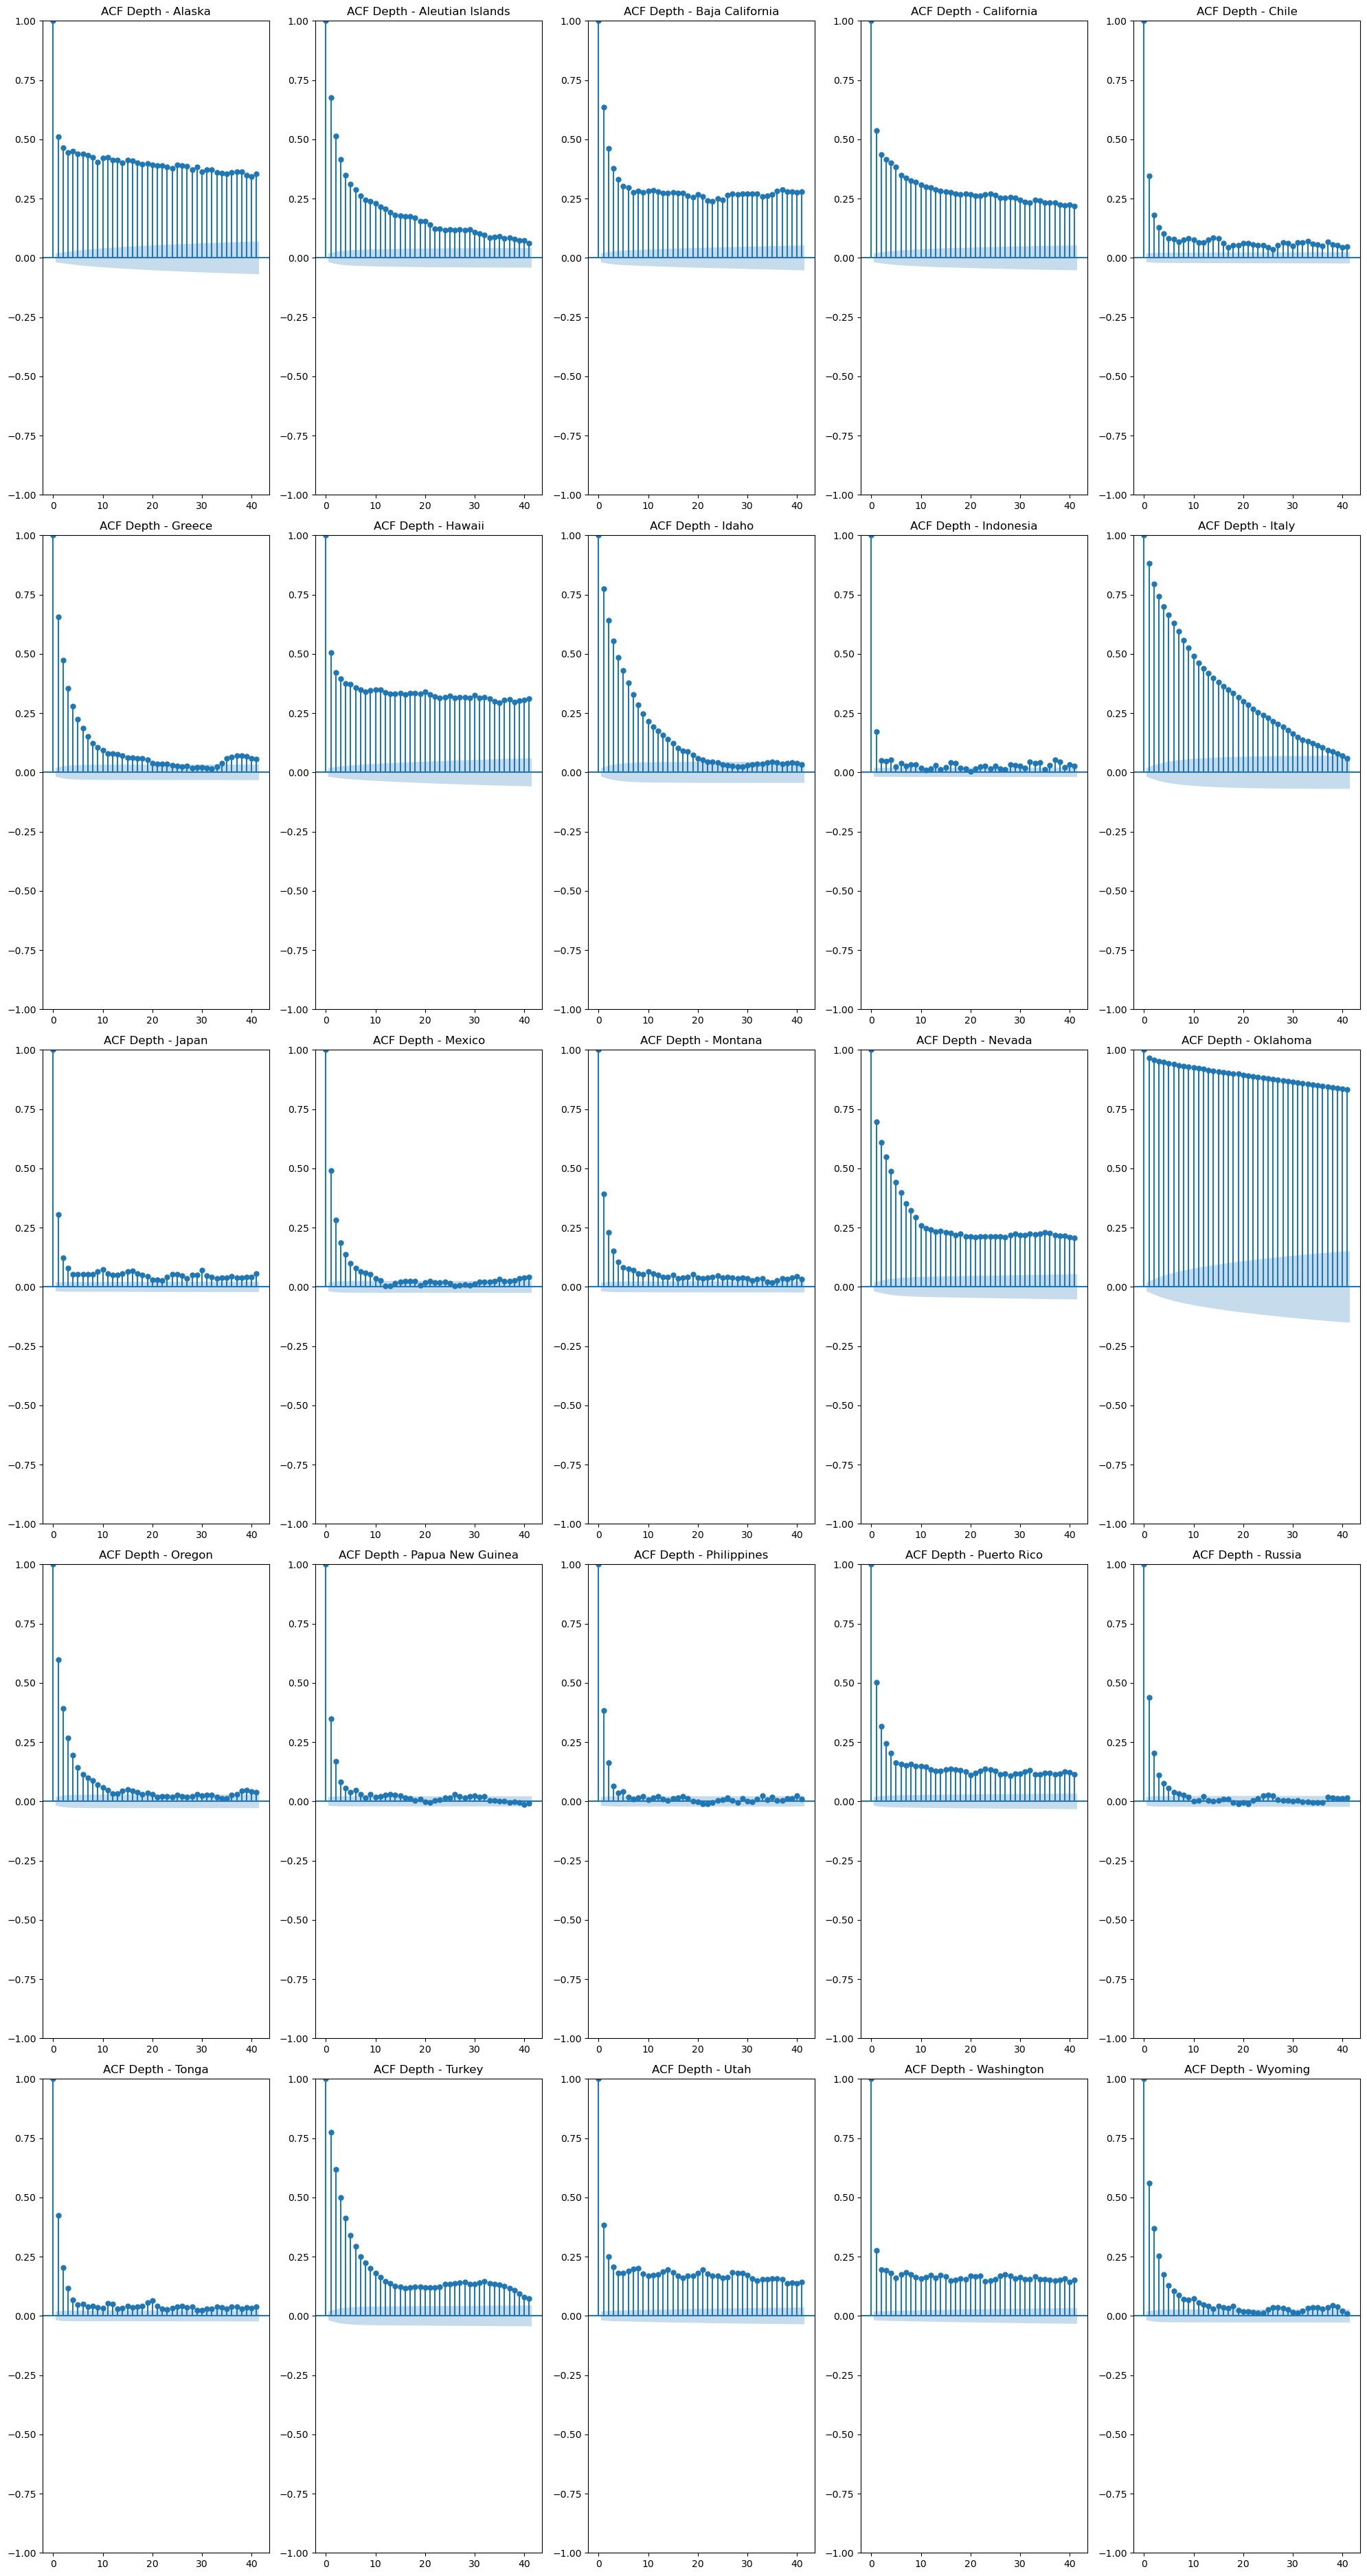

In [16]:
fig, axes = plt.subplots(5, 5, figsize=(20, 40), sharex=False, sharey=False)

for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]['depth']
    plot_acf(region_data, ax=ax, title=f'ACF Depth - {regions[i]}')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

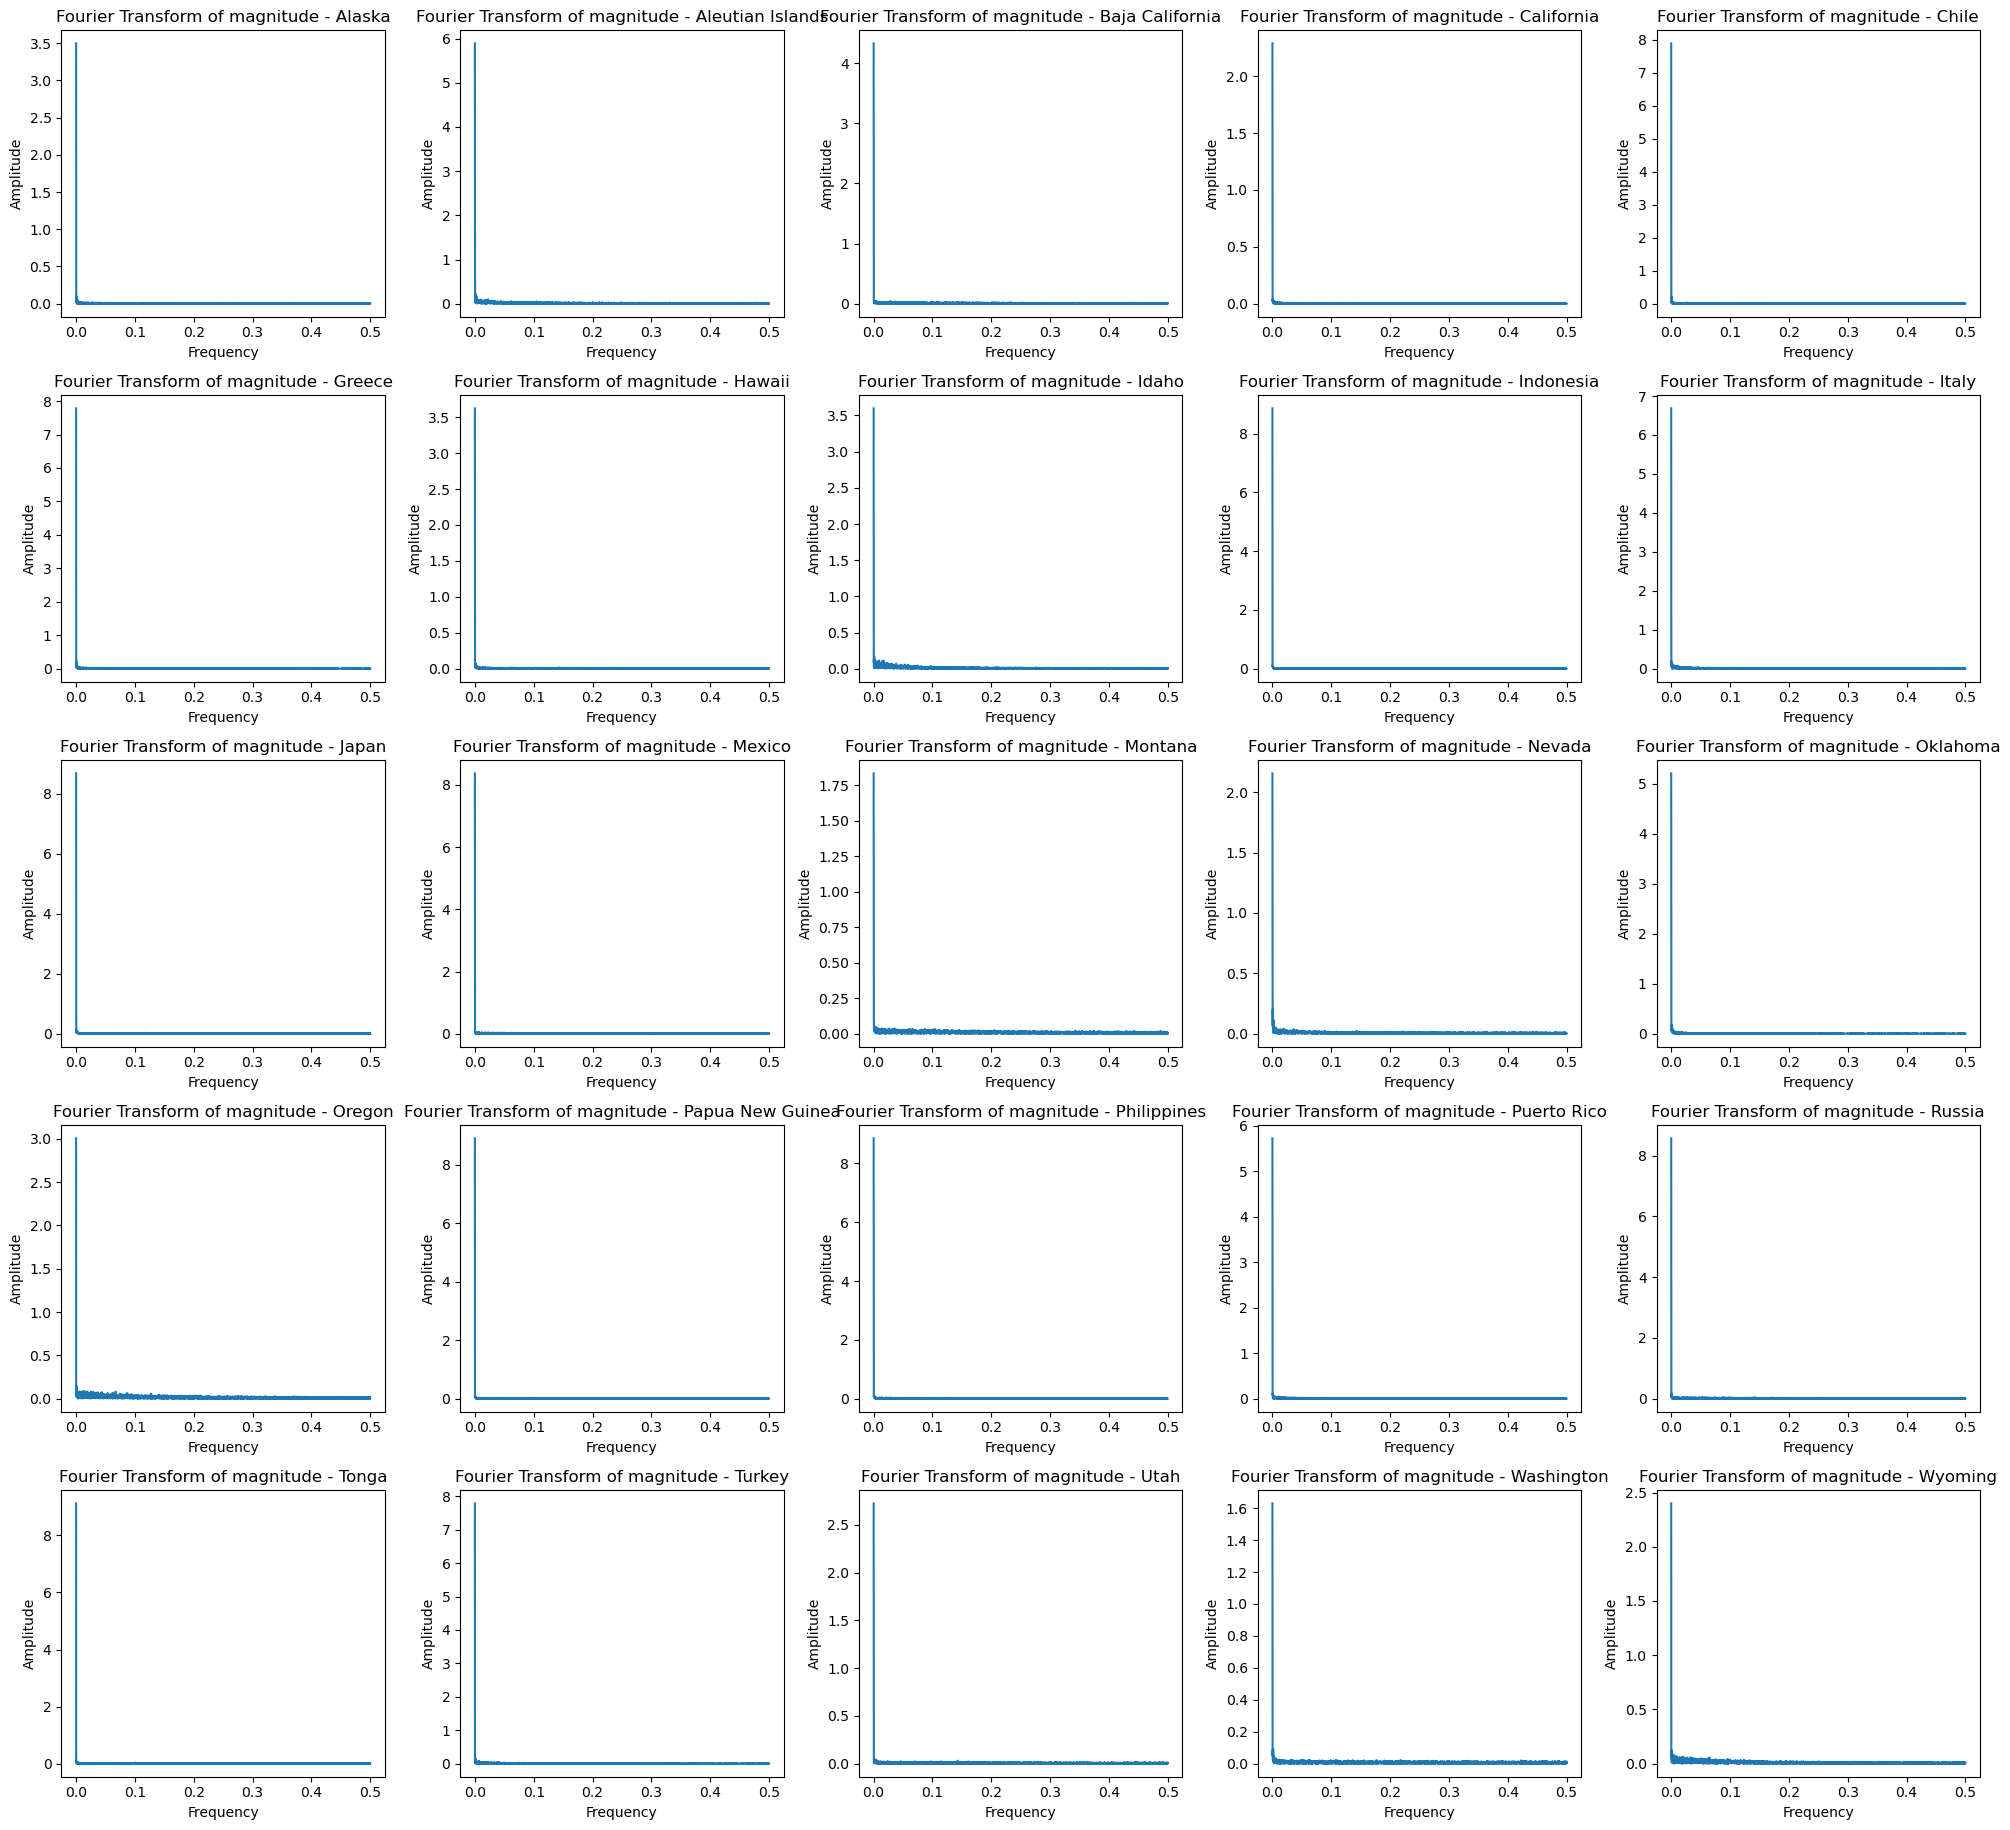

In [17]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

for i, ax in enumerate(axes.flat):
    region_data = df[df.region == regions[i]]['mag'].values
    yf = fft(region_data)
    xf = fftfreq(len(region_data), 1)[:len(region_data)//2]
    ax.plot(xf, 2.0/len(region_data) * np.abs(yf[:len(region_data)//2]))
    ax.set_title(f'Fourier Transform of magnitude - {regions[i]}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Amplitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

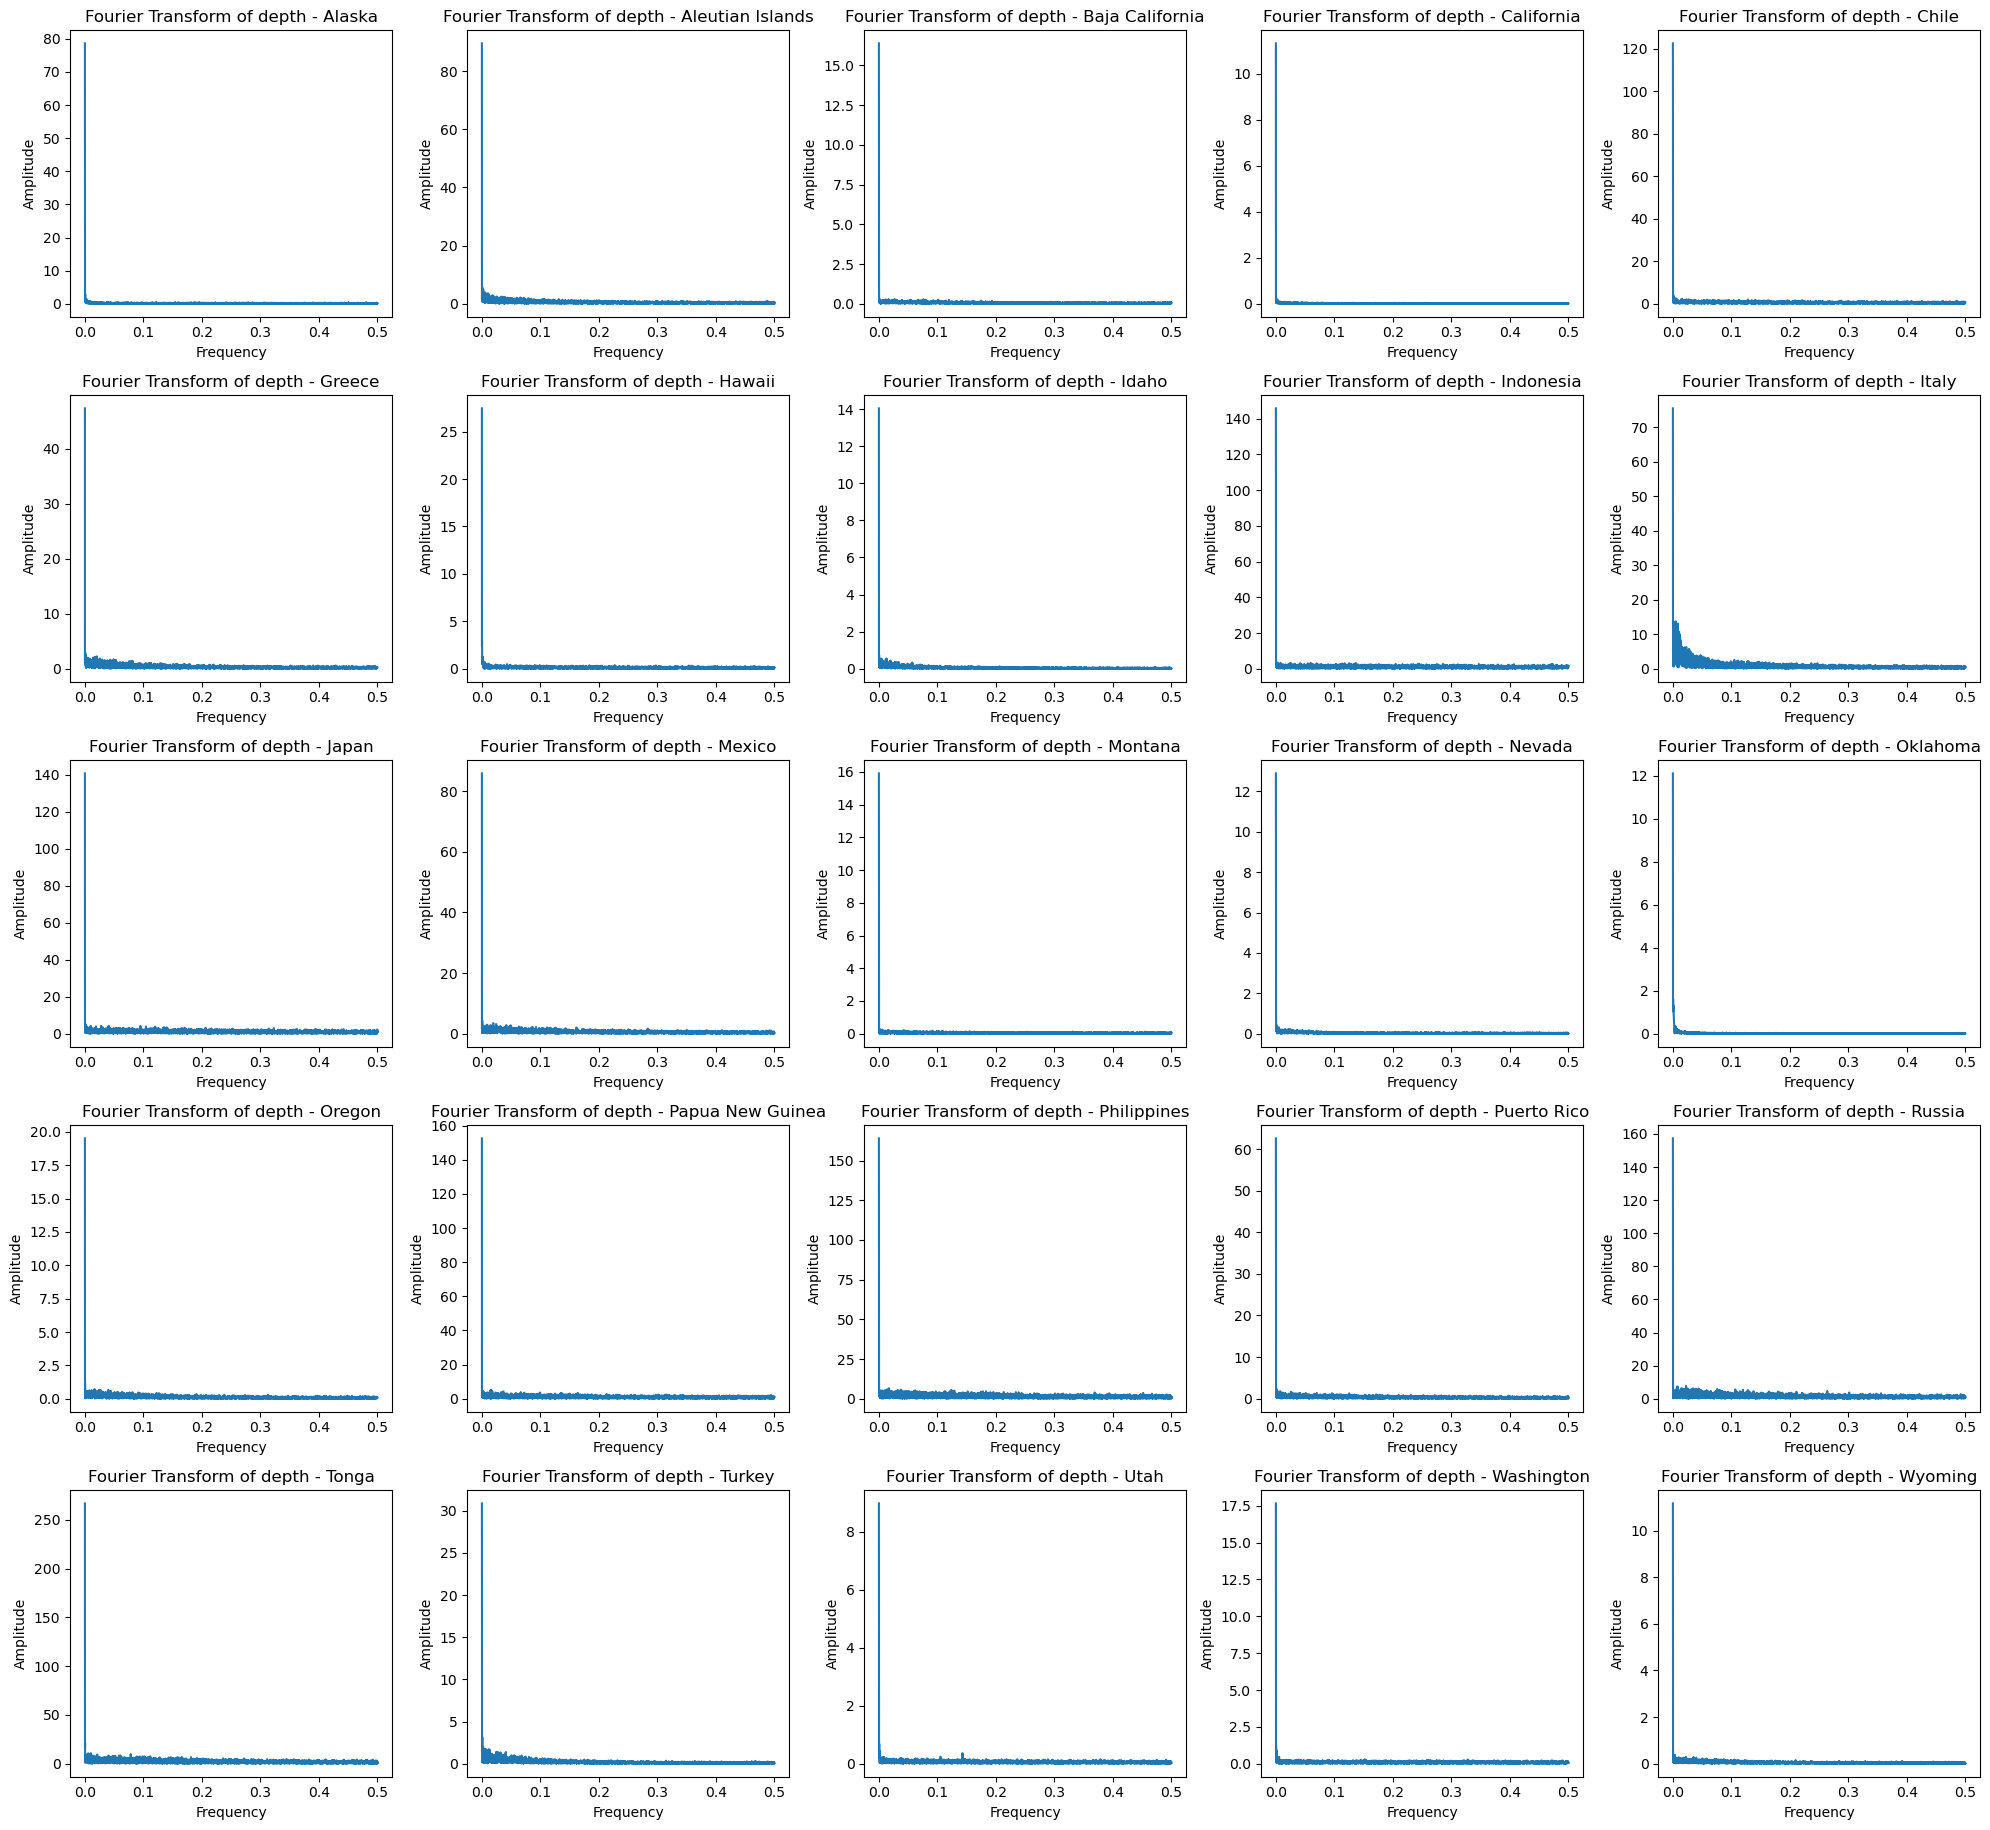

In [18]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

for i, ax in enumerate(axes.flat):
    region_data = df[df.region == regions[i]]['depth'].values
    yf = fft(region_data)
    xf = fftfreq(len(region_data), 1)[:len(region_data)//2]
    ax.plot(xf, 2.0/len(region_data) * np.abs(yf[:len(region_data)//2]))
    ax.set_title(f'Fourier Transform of depth - {regions[i]}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Amplitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
df["day"] = df.time.dt.day
df["dayofweek"] = df.time.dt.dayofweek
df["dayofyear"] = df.time.dt.dayofyear

start_lag = 1
end_lag = 7
for i in range(start_lag, end_lag + 1):
    df[f"mag_lag_{i}"] = df.groupby("region").mag.shift(i)

for i in range(start_lag, end_lag + 1):
    df[f"depth_lag_{i}"] = df.groupby("region").depth.shift(i)

df['mag_ewma'] = df.groupby('region')['mag'].transform(lambda x: x.ewm(span=7, adjust=False).mean())
df['depth_ewma'] = df.groupby('region')['depth'].transform(lambda x: x.ewm(span=7, adjust=False).mean())

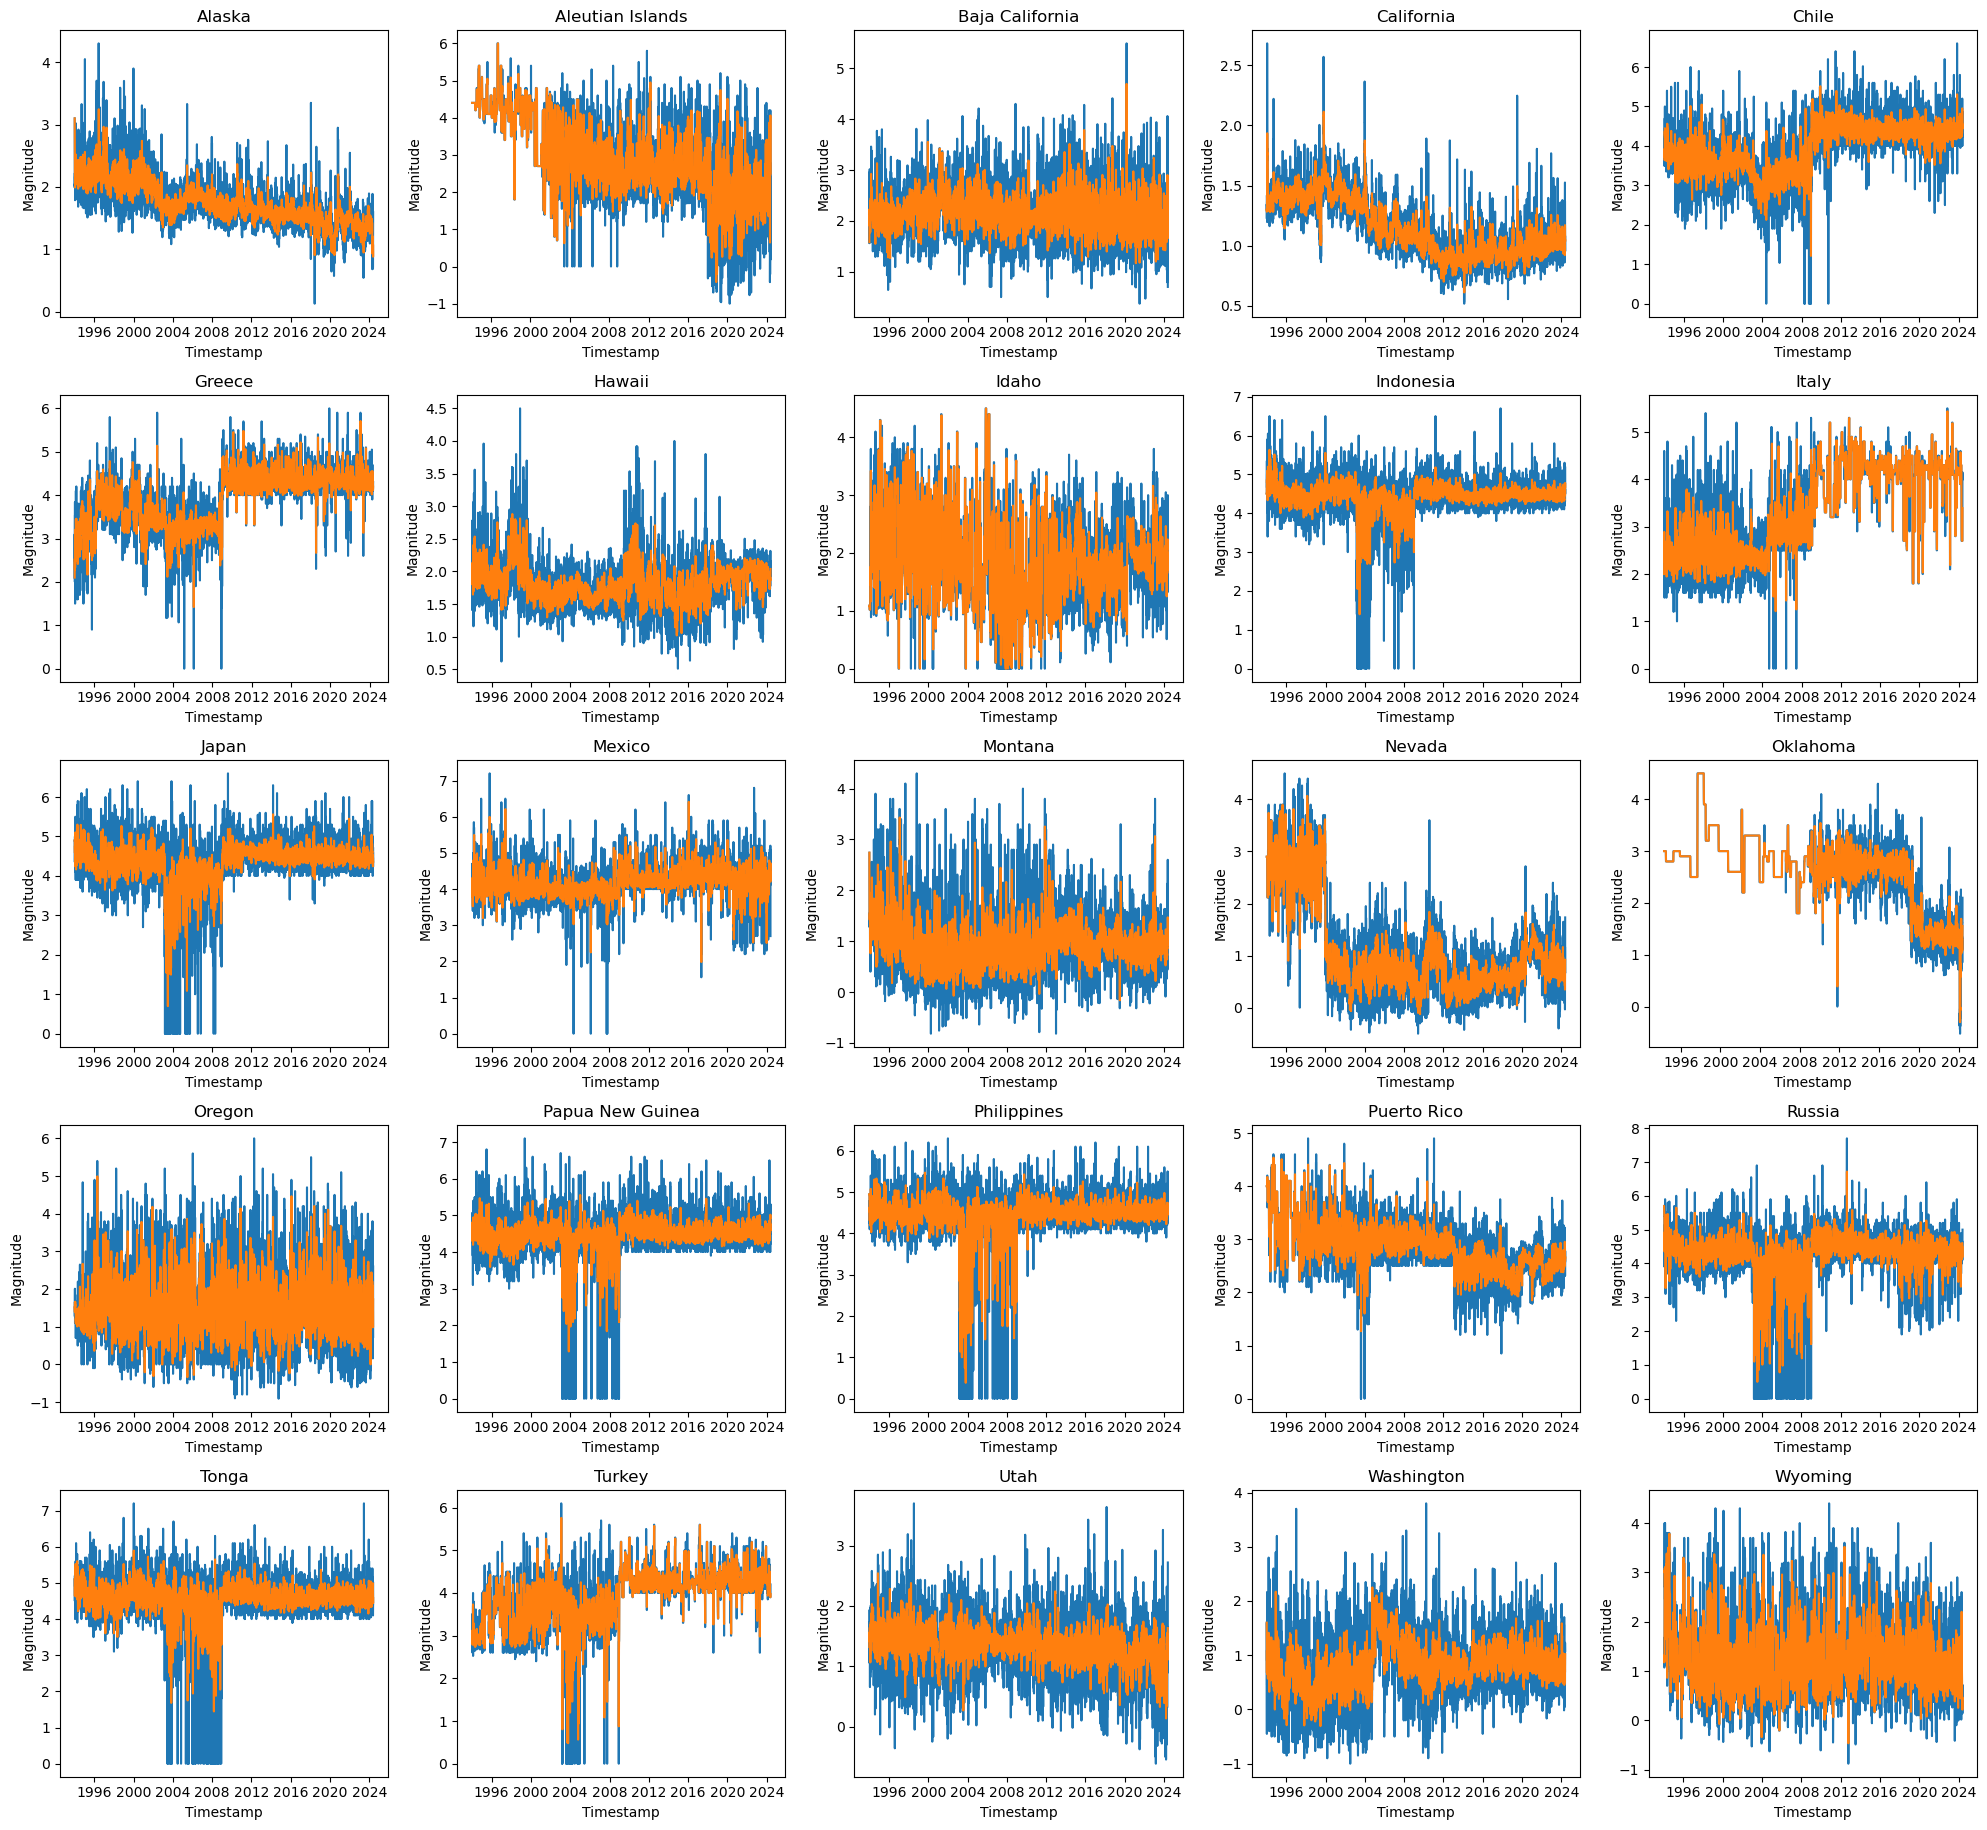

In [20]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.plot(region_data['time'], region_data['mag'], label='Actual')
    ax.plot(region_data['time'], region_data['mag_ewma'], label='Forecast')
    ax.set_title(regions[i])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Magnitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

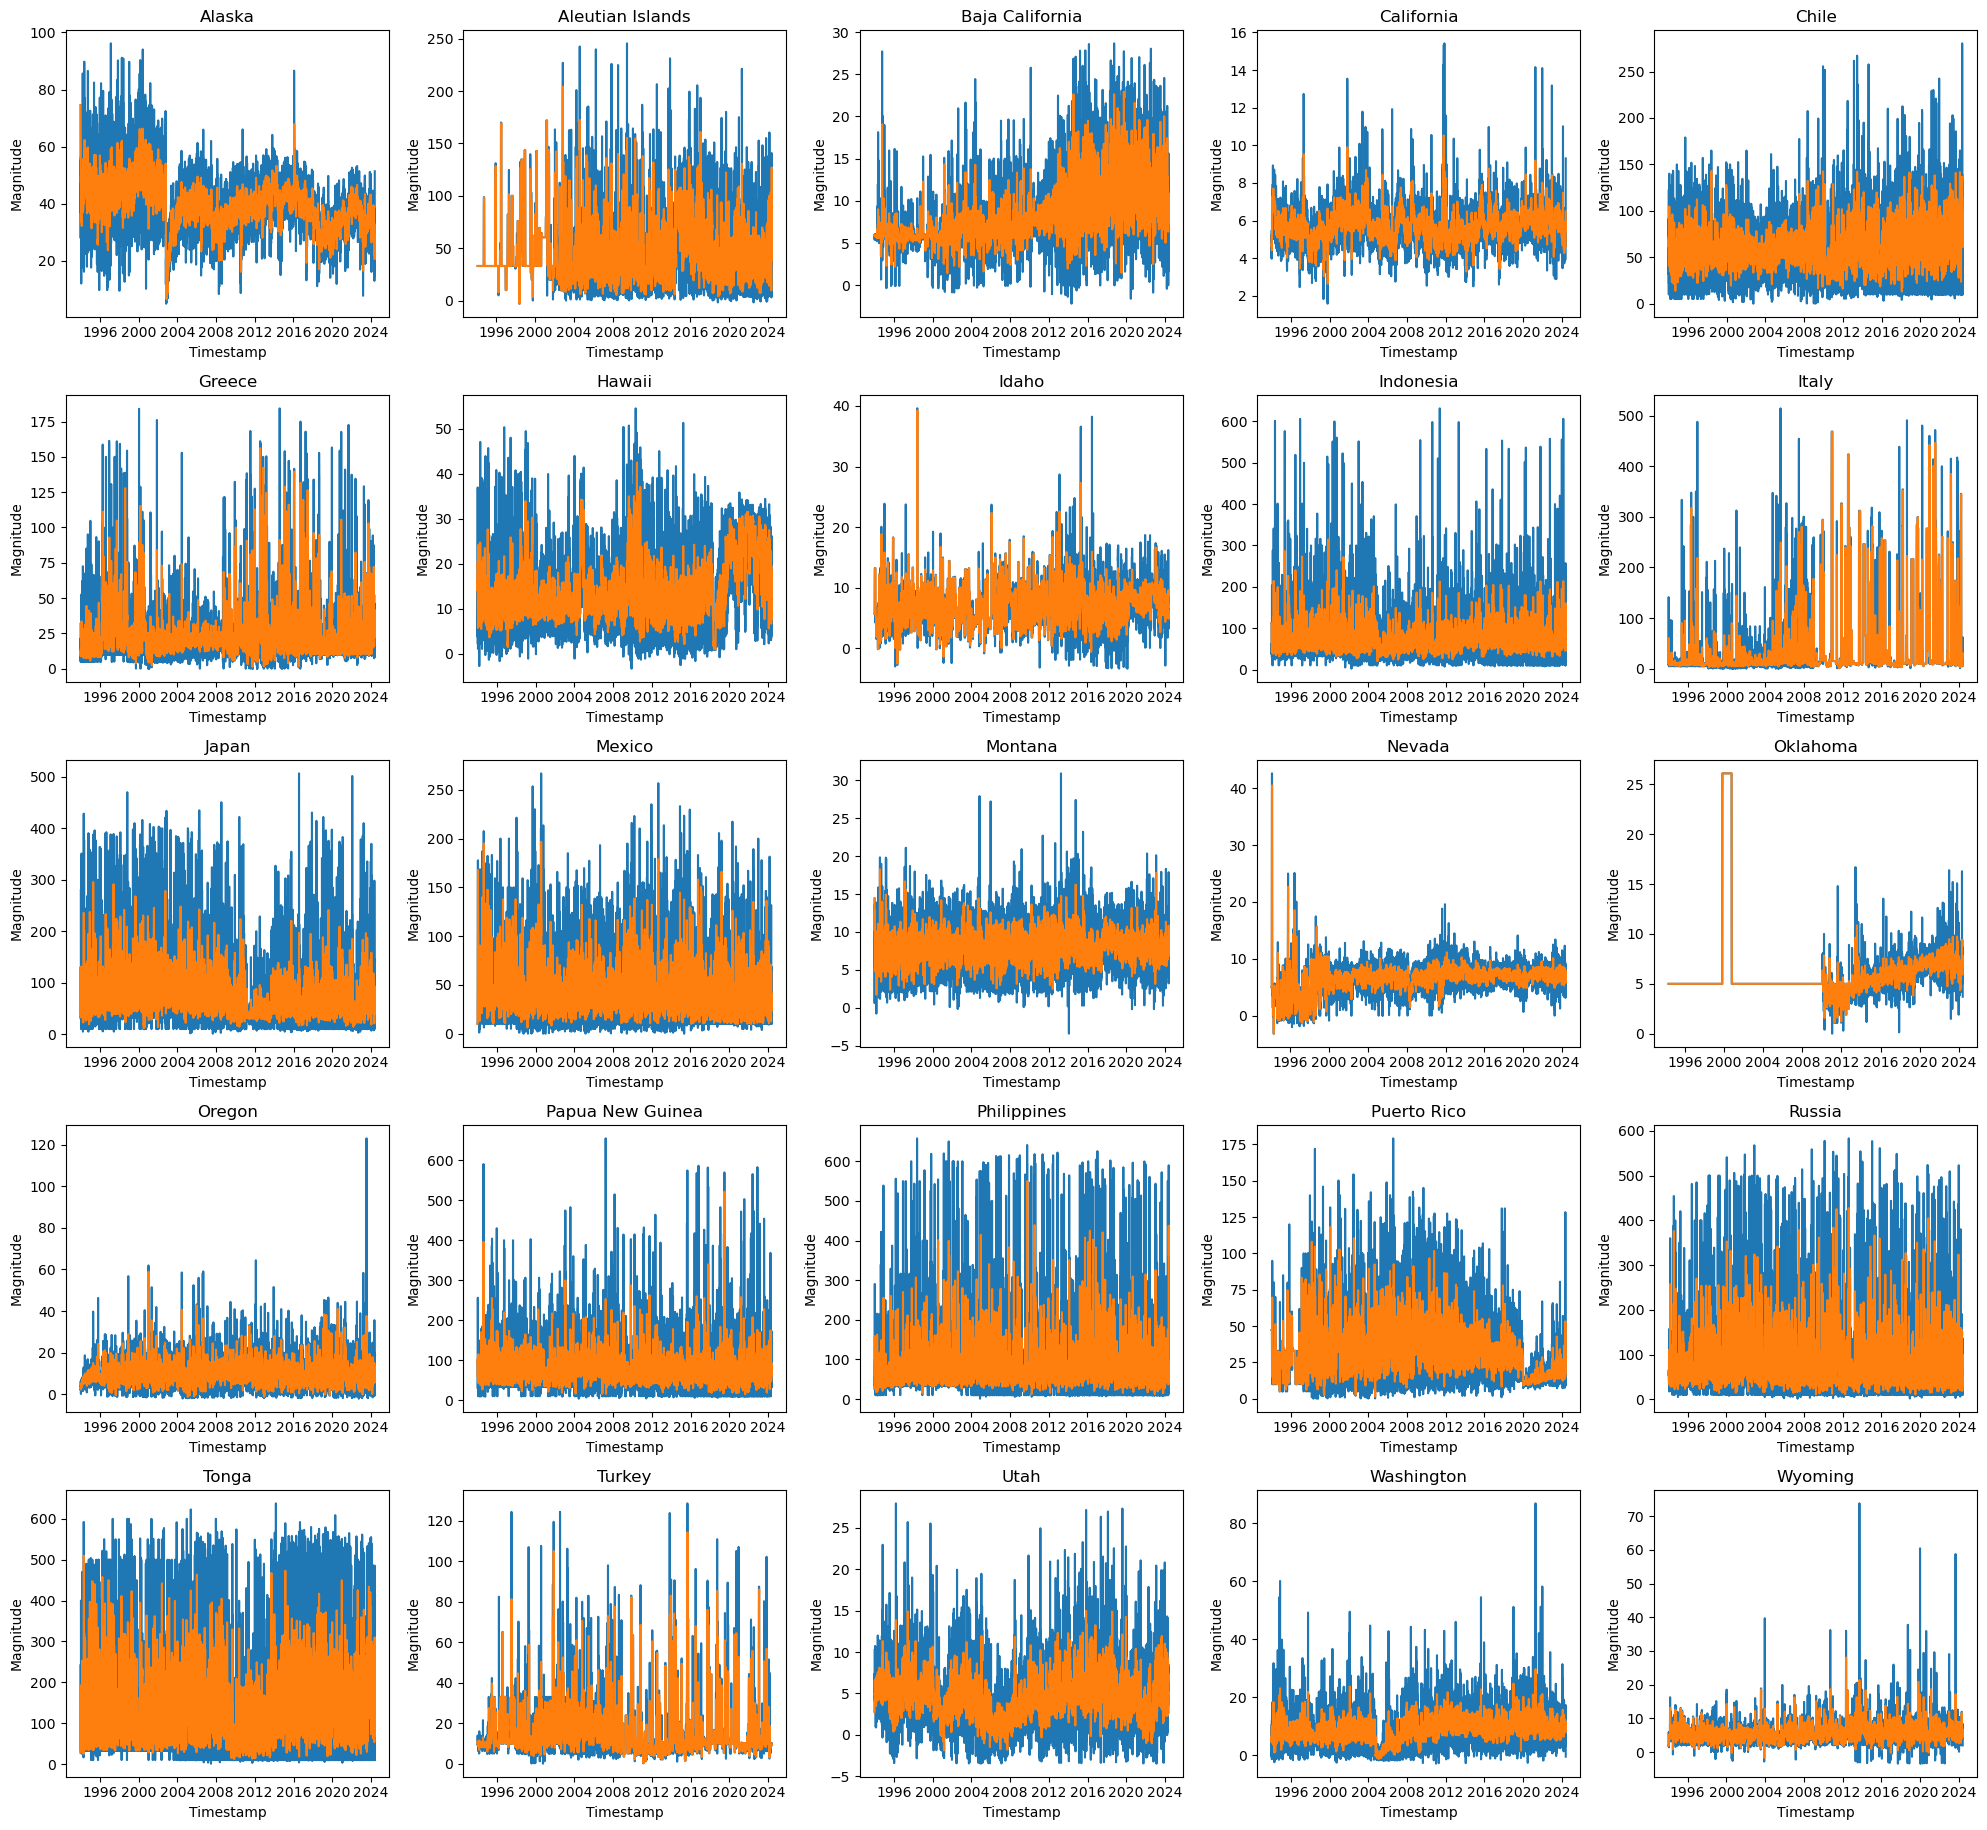

In [21]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df[df['region'] == regions[i]]
    ax.plot(region_data['time'], region_data['depth'], label='Actual')
    ax.plot(region_data['time'], region_data['depth_ewma'], label='Forecast')
    ax.set_title(regions[i])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Magnitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [22]:
features = (
    [
        "day",
        "dayofweek",
        "dayofyear",
        "mag_ewma",
        "depth_ewma",
    ]
    + [f"mag_lag_{i}" for i in range(start_lag, end_lag + 1)]
    + [f"depth_lag_{i}" for i in range(start_lag, end_lag + 1)]
)
cat_features = ["region"]
target = ["mag", "depth"]

In [23]:
df = df.sort_values(by=['region', 'time'])

In [24]:
grouped = df.groupby('region')

train_list = []
test_list = []
for name, group in grouped:
    n = len(group)
    test_size = 0.2
    split_index = int(n * (1 - test_size))

    train_list.append(group.iloc[:split_index])
    test_list.append(group.iloc[split_index:])

# Combine the training and test sets
df_train = pd.concat(train_list)
df_test = pd.concat(test_list)

In [25]:
df_train.head()

region                      time      depth       mag   latitude  \
0  Alaska 1994-01-01 00:00:00+00:00  74.540000  3.100000  60.250980   
1  Alaska 1994-01-02 00:00:00+00:00  61.183333  2.366667  60.914383   
2  Alaska 1994-01-03 00:00:00+00:00  27.942857  1.990476  62.789643   
3  Alaska 1994-01-04 00:00:00+00:00  50.640000  2.393333  60.305067   
4  Alaska 1994-01-05 00:00:00+00:00  51.933333  2.538889  61.675750   

    longitude  day  dayofweek  dayofyear  mag_lag_1  ...  mag_lag_7  \
0 -152.811640    1          5          1        NaN  ...        NaN   
1 -150.188400    2          6          2   3.100000  ...        NaN   
2 -149.244229    3          0          3   2.366667  ...        NaN   
3 -127.430487    4          1          4   1.990476  ...        NaN   
4 -151.244972    5          2          5   2.393333  ...        NaN   

   depth_lag_1  depth_lag_2  depth_lag_3  depth_lag_4  depth_lag_5  \
0          NaN          NaN          NaN          NaN          NaN   
1    74.540000          NaN          NaN          NaN          NaN   
2    61.183333    74.540000          NaN          NaN          NaN   
3    27.942857    61.183333    74.540000          NaN          NaN   
4    50.640000    27.942857    61.183333        74.54          NaN   

   depth_lag_6  depth_lag_7  mag_ewma  depth_ewma  
0          NaN          NaN  3.100000   74.540000  
1          NaN          NaN  2.916667   71.200833  
2          NaN          NaN  2.685119   60.386339  
3          NaN          NaN  2.612173   57.949754  
4          NaN          NaN  2.593852   56.445649  

[5 rows x 25 columns]

In [26]:
df_train = df_train.dropna()

In [27]:
df_test.head()

region                      time      depth       mag   latitude  \
8883  Alaska 2018-04-28 00:00:00+00:00  42.858264  1.532810  60.474846   
8884  Alaska 2018-04-29 00:00:00+00:00  37.141417  1.628898  60.000803   
8885  Alaska 2018-04-30 00:00:00+00:00  33.499030  1.641493  58.925755   
8886  Alaska 2018-05-01 00:00:00+00:00  40.155179  1.425446  59.422451   
8887  Alaska 2018-05-02 00:00:00+00:00  34.204464  1.548125  59.813091   

       longitude  day  dayofweek  dayofyear  mag_lag_1  ...  mag_lag_7  \
8883 -152.538592   28          5        118   1.317391  ...   1.543900   
8884 -153.438751   29          6        119   1.532810  ...   1.517813   
8885 -154.280734   30          0        120   1.628898  ...   1.517813   
8886 -152.065312    1          1        121   1.641493  ...   1.531600   
8887 -153.400697    2          2        122   1.425446  ...   1.520000   

      depth_lag_1  depth_lag_2  depth_lag_3  depth_lag_4  depth_lag_5  \
8883    30.035826    32.001379    36.188617    34.956400    42.852344   
8884    42.858264    30.035826    32.001379    36.188617    34.956400   
8885    37.141417    42.858264    30.035826    32.001379    36.188617   
8886    33.499030    37.141417    42.858264    30.035826    32.001379   
8887    40.155179    33.499030    37.141417    42.858264    30.035826   

      depth_lag_6  depth_lag_7  mag_ewma  depth_ewma  
8883    42.852344    30.139200  1.514149   36.455688  
8884    42.852344    42.852344  1.542836   36.627120  
8885    34.956400    42.852344  1.567500   35.845098  
8886    36.188617    34.956400  1.531987   36.922618  
8887    32.001379    36.188617  1.536021   36.243080  

[5 rows x 25 columns]

In [28]:
depth = 10
iterations = 1000
model = cb.CatBoostRegressor(
    early_stopping_rounds=20,
    cat_features=cat_features,
    depth=depth,
    iterations=iterations,
    loss_function="MultiRMSE",
)

X = df_train[features + cat_features]
y = df_train[target]
model = model.fit(X, y)

0:	learn: 56.8271604	total: 157ms	remaining: 2m 37s
1:	learn: 55.6069439	total: 229ms	remaining: 1m 54s
2:	learn: 54.4174642	total: 299ms	remaining: 1m 39s
3:	learn: 53.2786472	total: 362ms	remaining: 1m 30s
4:	learn: 52.1596714	total: 432ms	remaining: 1m 26s
5:	learn: 51.0935264	total: 500ms	remaining: 1m 22s
6:	learn: 50.0627611	total: 570ms	remaining: 1m 20s
7:	learn: 49.0504292	total: 658ms	remaining: 1m 21s
8:	learn: 48.0751975	total: 728ms	remaining: 1m 20s
9:	learn: 47.1463766	total: 790ms	remaining: 1m 18s
10:	learn: 46.2315380	total: 852ms	remaining: 1m 16s
11:	learn: 45.3665951	total: 920ms	remaining: 1m 15s
12:	learn: 44.5143932	total: 989ms	remaining: 1m 15s
13:	learn: 43.7028082	total: 1.05s	remaining: 1m 14s
14:	learn: 42.9353015	total: 1.11s	remaining: 1m 13s
15:	learn: 42.1566653	total: 1.17s	remaining: 1m 12s
16:	learn: 41.4133280	total: 1.24s	remaining: 1m 11s
17:	learn: 40.6981044	total: 1.31s	remaining: 1m 11s
18:	learn: 40.0048537	total: 1.37s	remaining: 1m 10s
19:

In [29]:
prediction = model.predict(df_test[features + cat_features])
print(f"Mean Absolute Error: {mean_absolute_error(df_test[target], prediction)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(df_test[target], prediction))}")

r2 = r2_score(df_test[target], prediction)
print(f"R2 Score: {r2}")

# Number of observations
n = X.shape[0]

# Number of predictors
p = X.shape[1]

# Calculate adjusted R^2 score
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print(f'Adjusted R2: {adjusted_r2}')

Mean Absolute Error: 3.1860842217425516
Root Mean Squared Error: 10.37639546415206
R2 Score: 0.9372677940569124
Adjusted R2: 0.9372621339656988


In [30]:
df_forecast = pd.DataFrame(prediction, columns=["mag_forecast", "depth_forecast"])
df_test = df_test.reset_index()
df_test = df_test.join(df_forecast)

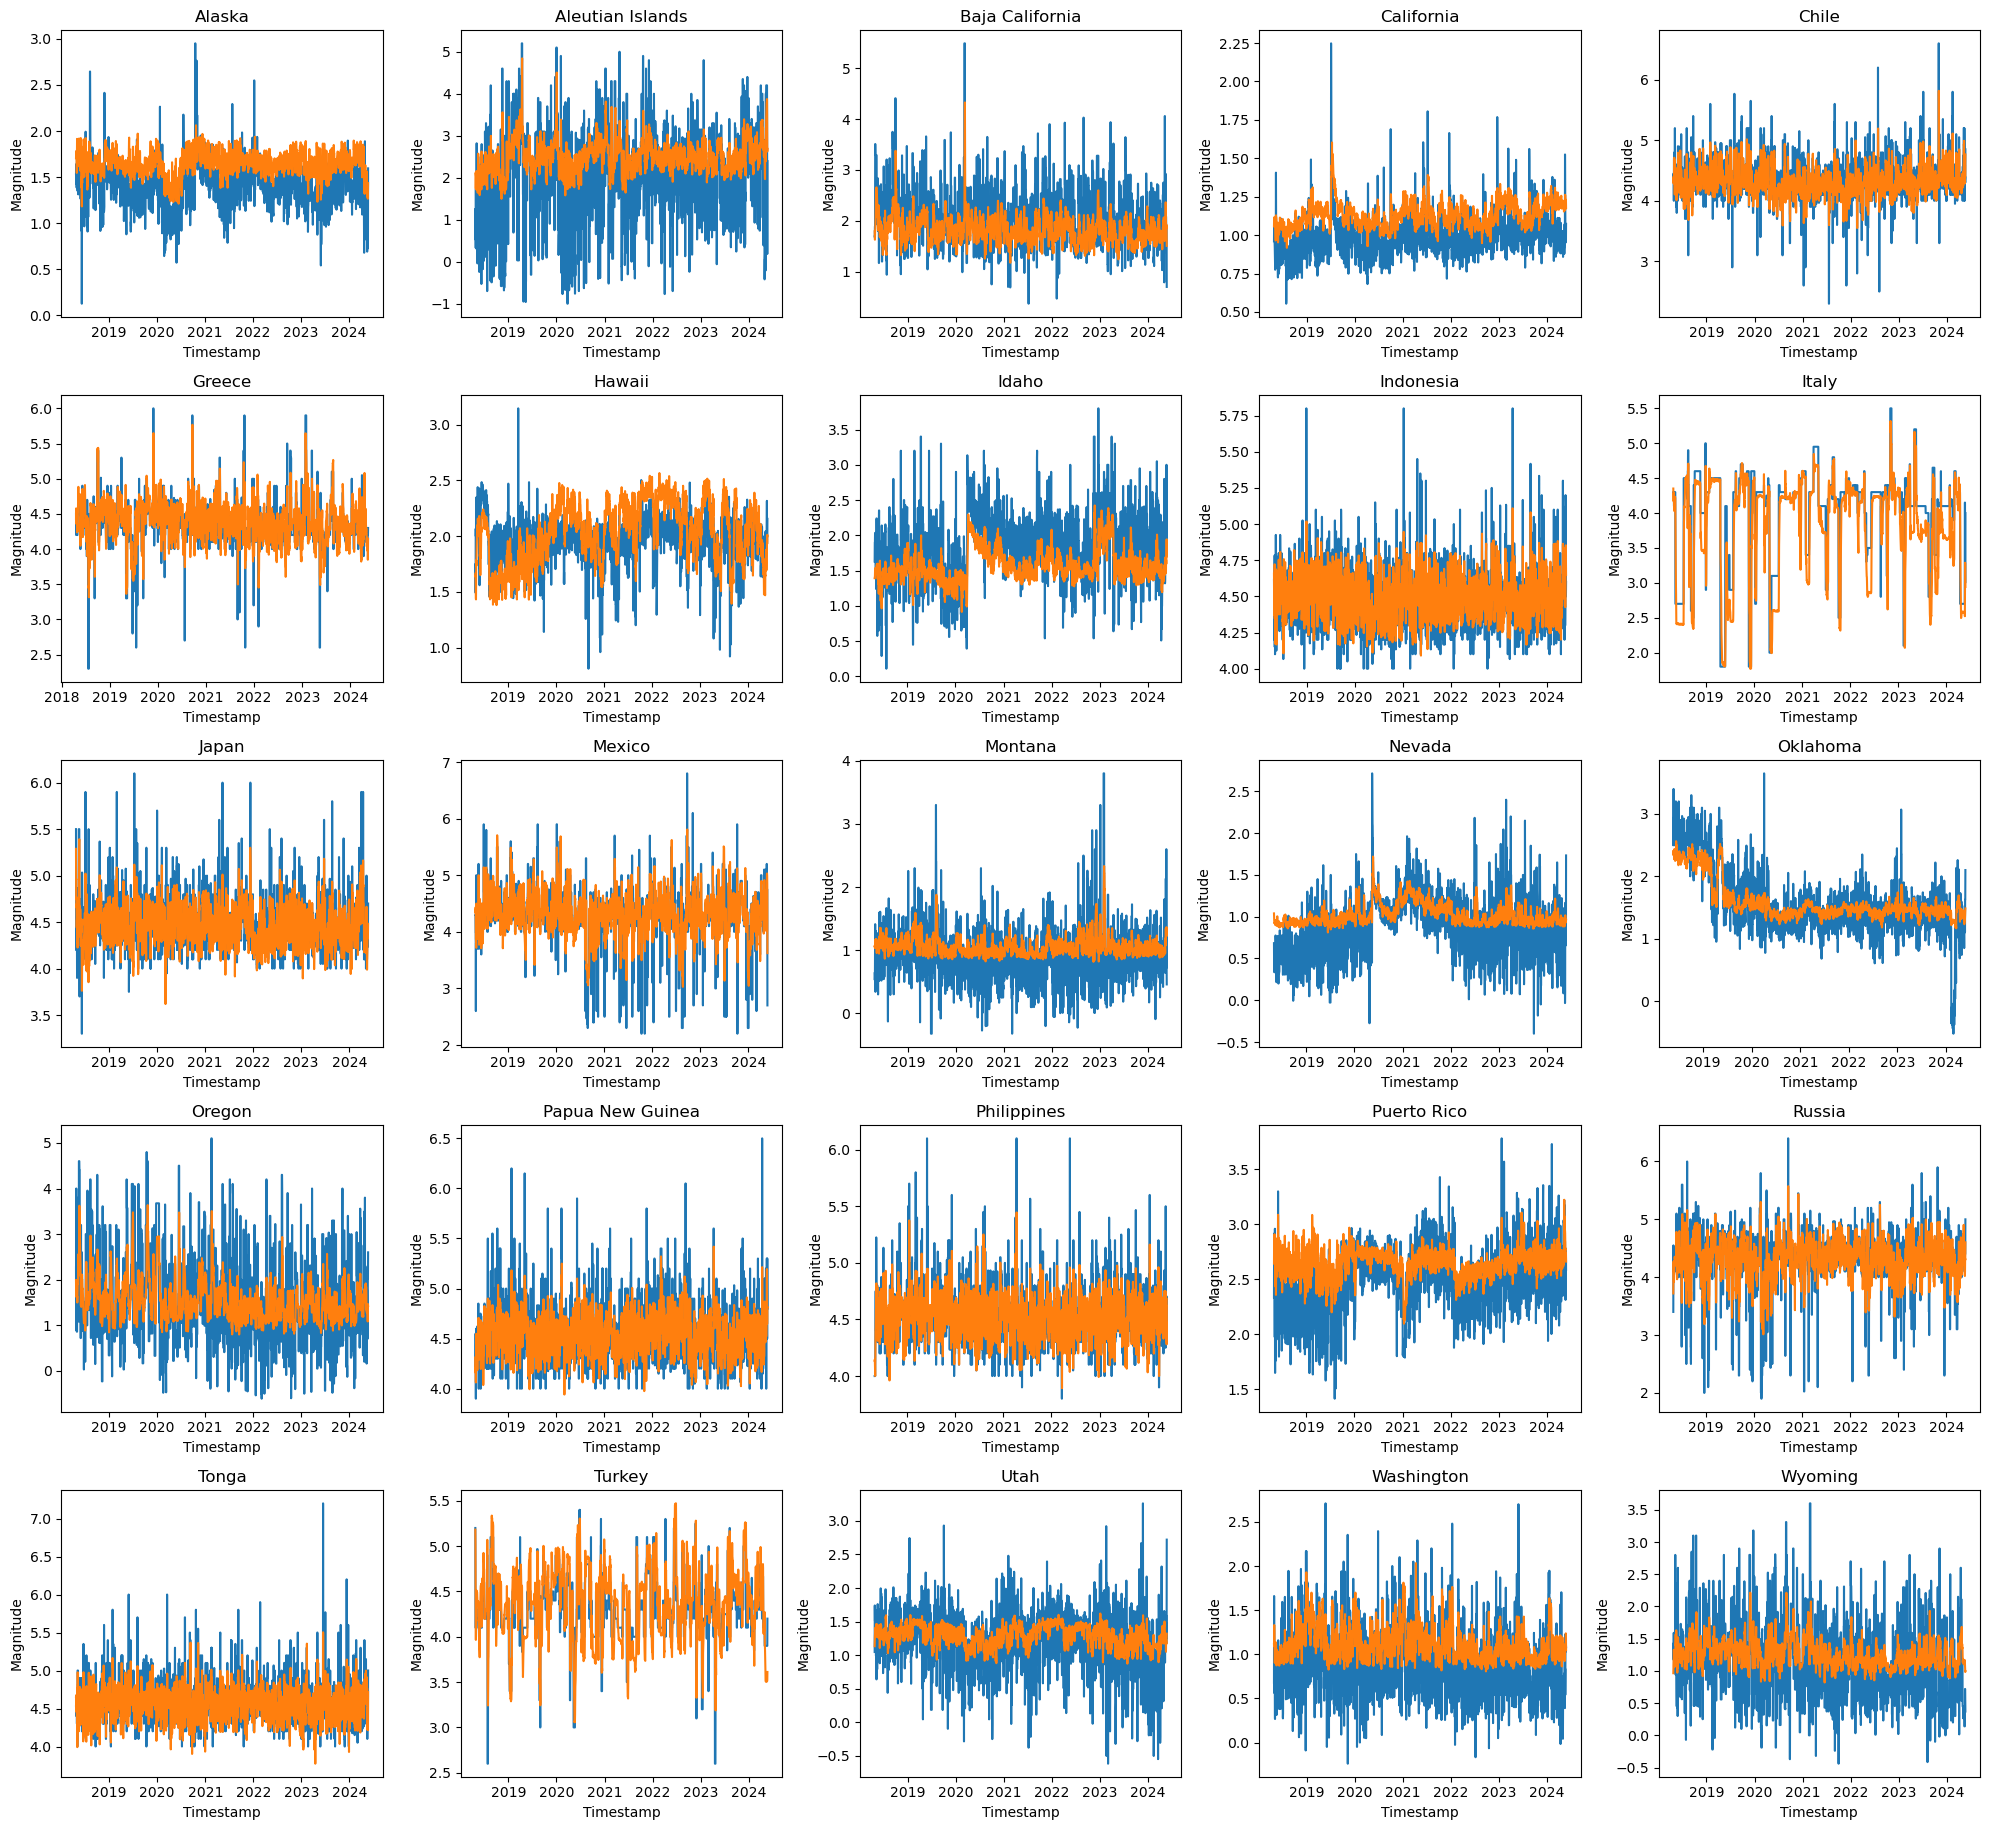

In [31]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df_test['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df_test[df_test['region'] == regions[i]]
    ax.plot(region_data['time'], region_data['mag'], label='Actual')
    ax.plot(region_data['time'], region_data['mag_forecast'], label='Forecast')
    ax.set_title(regions[i])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Magnitude')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

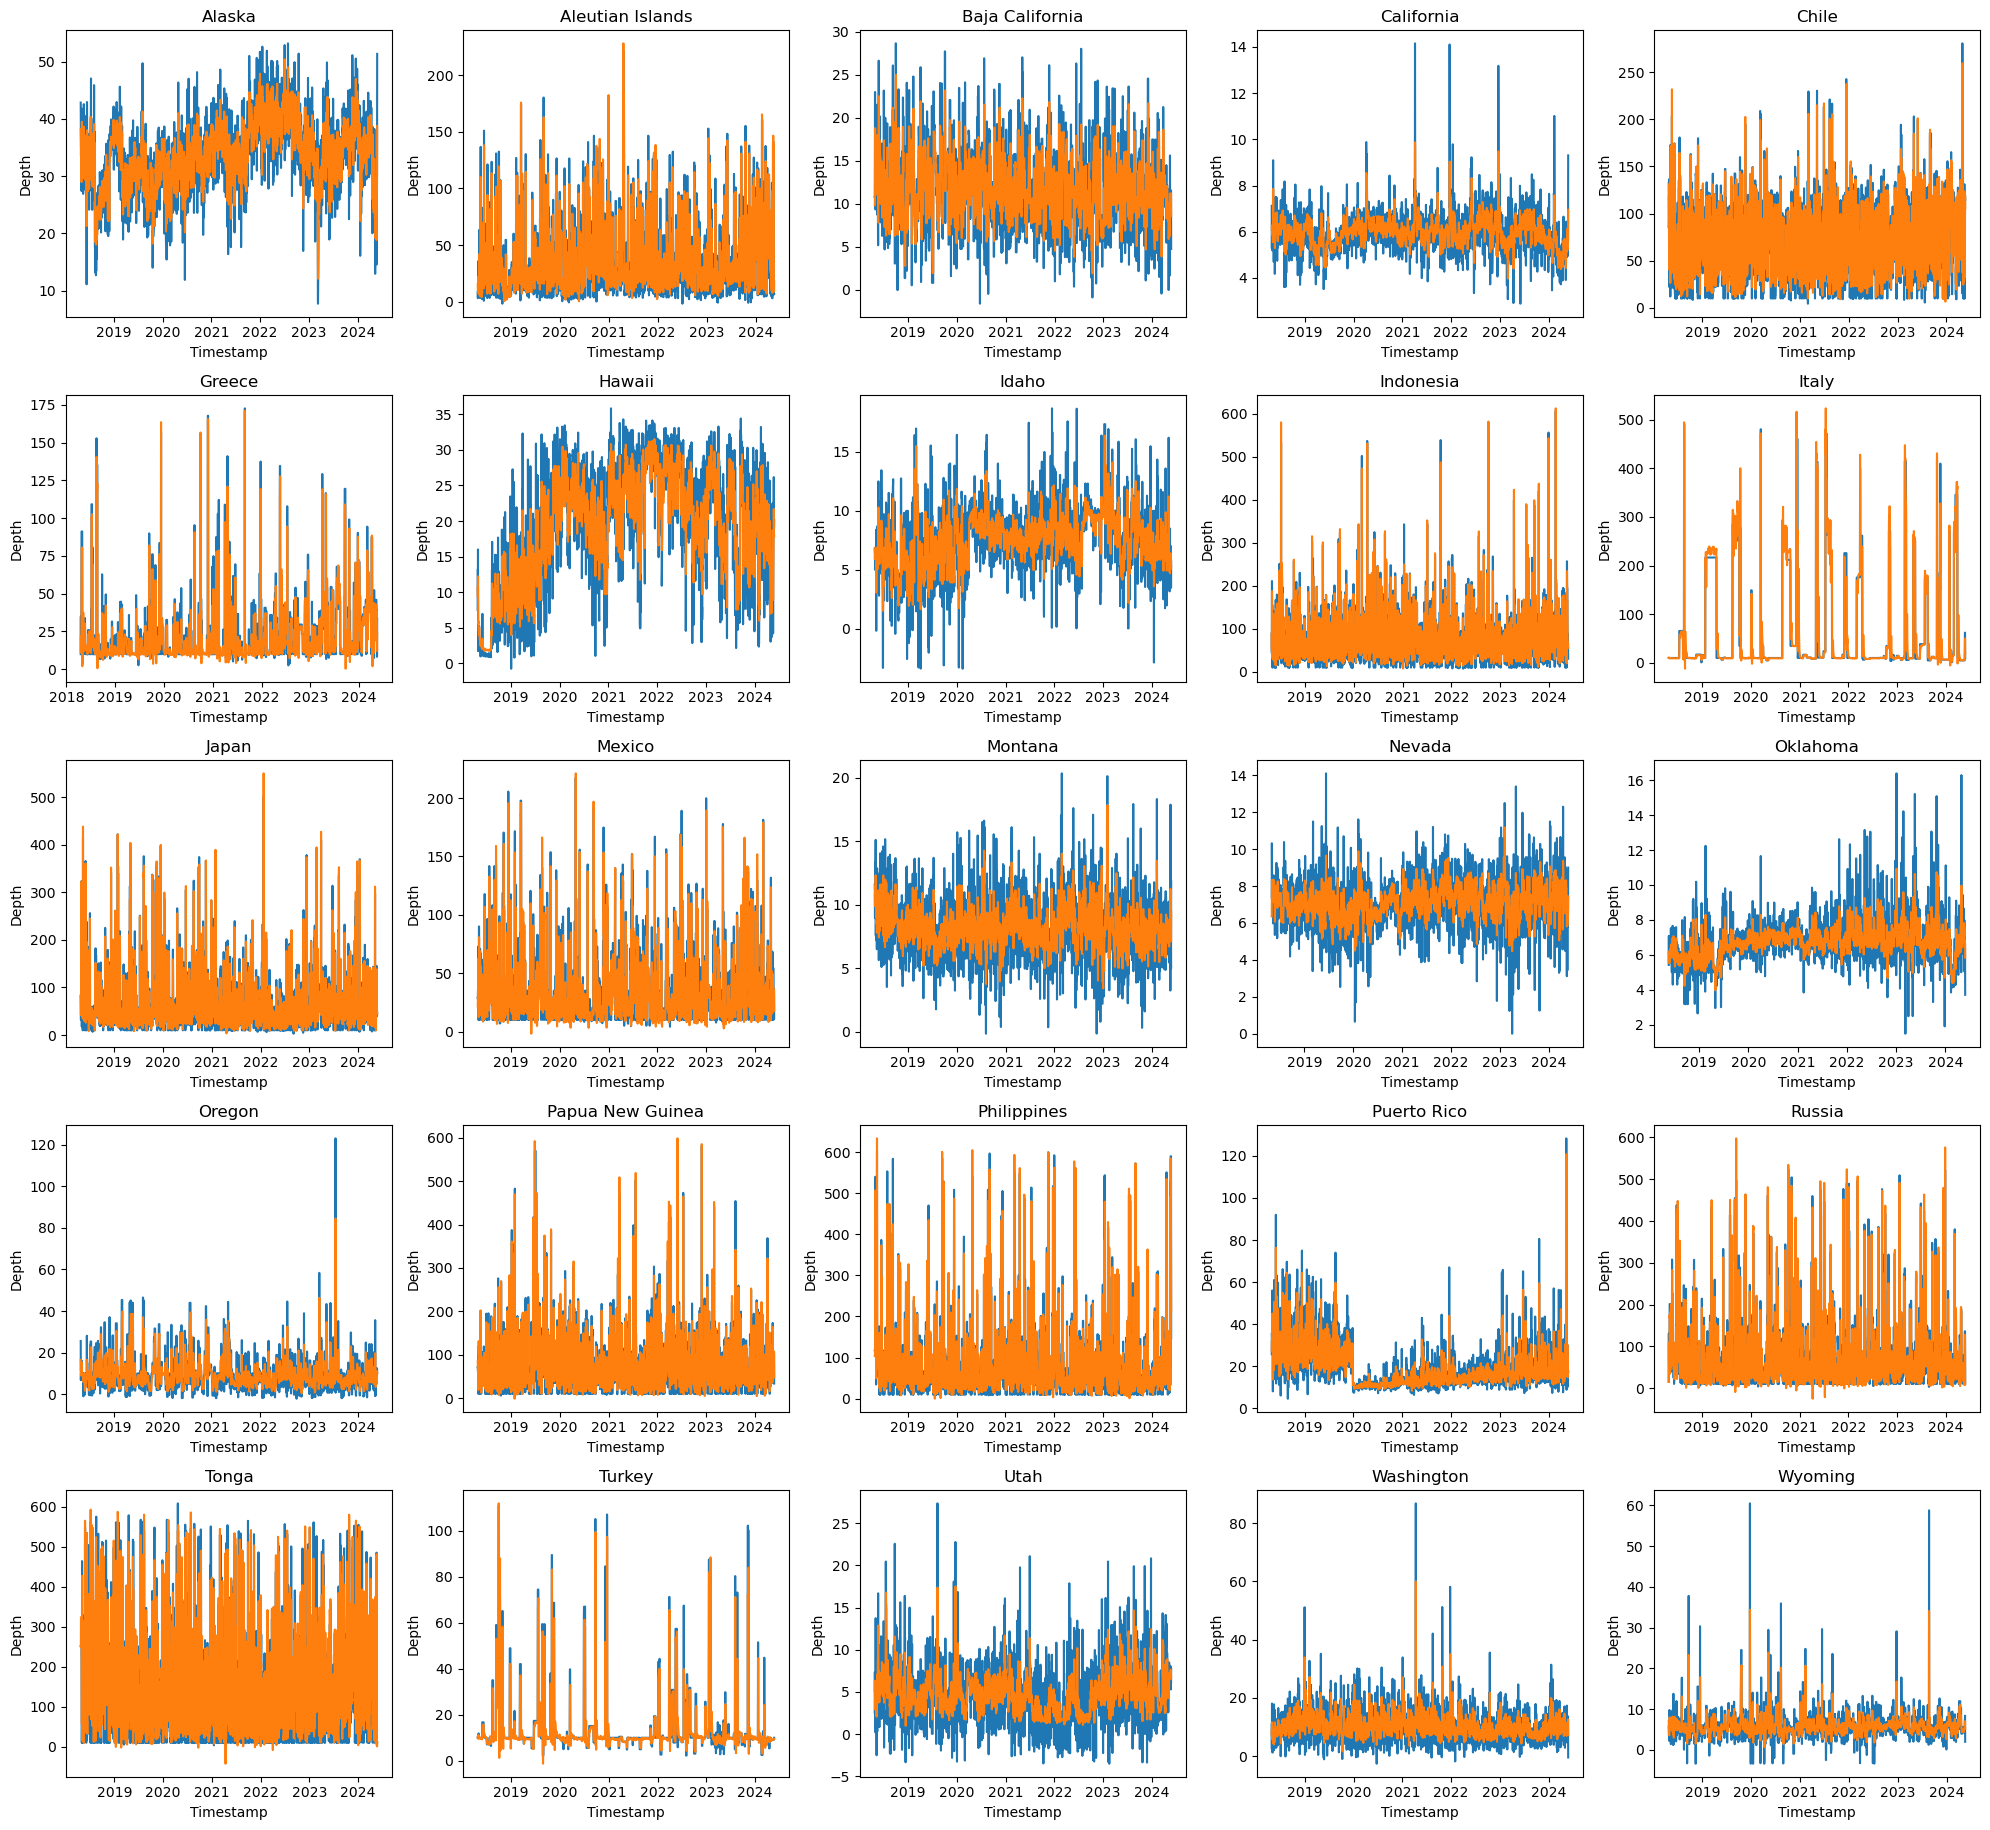

In [32]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharex=False, sharey=False)

regions = df_test['region'].unique()
for i, ax in enumerate(axes.flat):
    region_data = df_test[df_test['region'] == regions[i]]
    ax.plot(region_data['time'], region_data['depth'], label='Actual')
    ax.plot(region_data['time'], region_data['depth_forecast'], label='Forecast')
    ax.set_title(regions[i])
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Depth')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

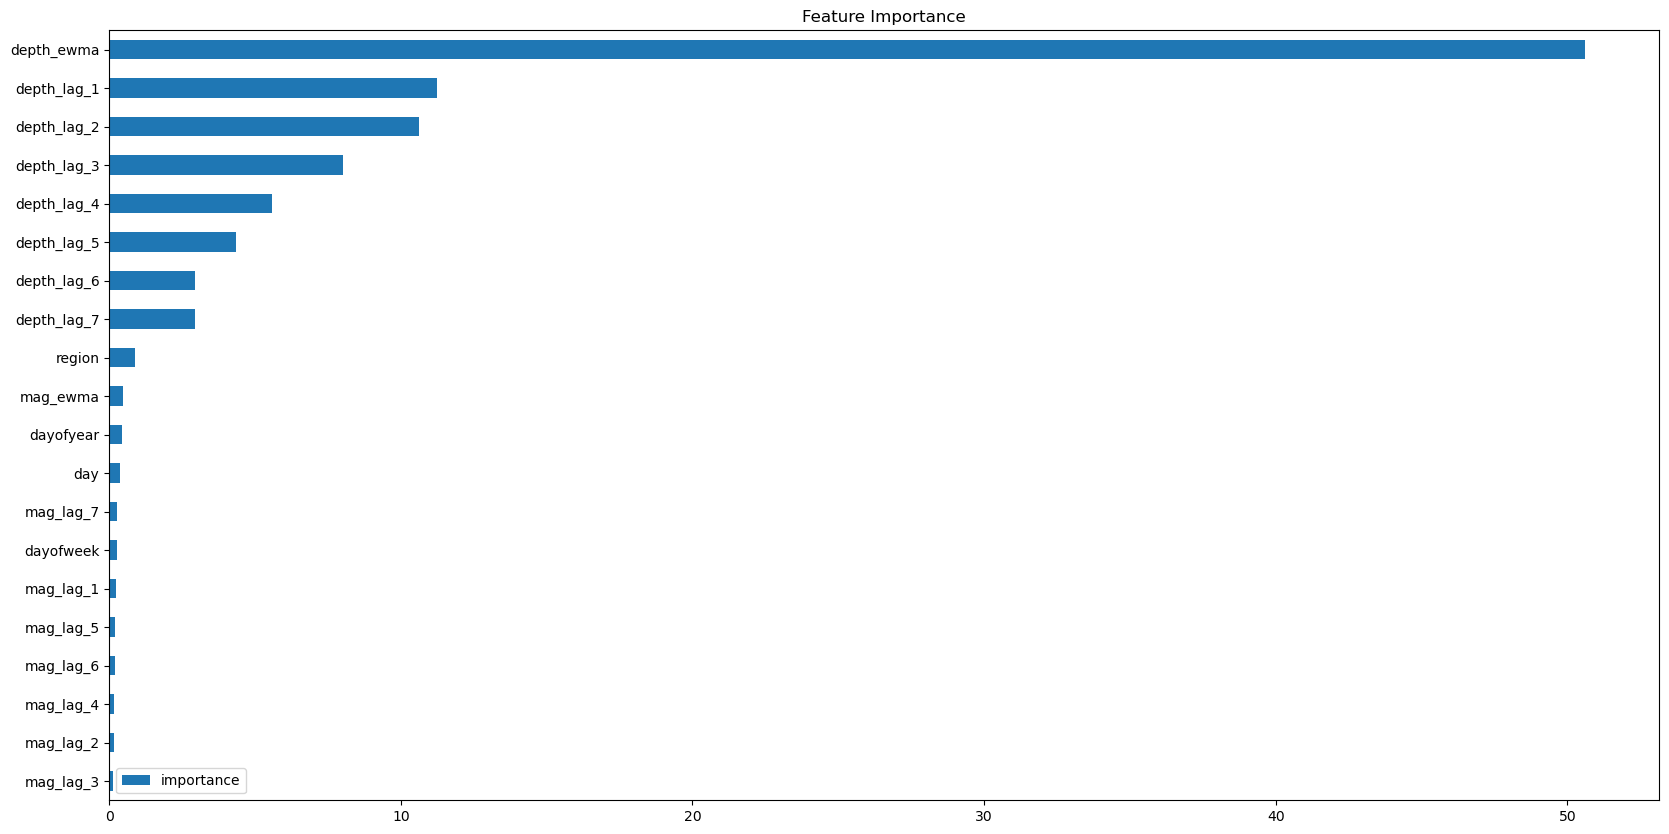

In [33]:
fi = pd.DataFrame(data=model.get_feature_importance(), index=model.feature_names_, columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance', figsize=(20, 10))
plt.show()

In [34]:
model.save_model('forecasting_model')